# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings and do not display them

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(15,8)})

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Python/used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Viewing the first 5 rows of the data frame
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# Viewing the last 5 rows of the data frame
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
# checking the shape of the data
df.shape

(3454, 15)

In [ ]:
# checking for the datatypes of the colums
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
# view the shape of the dataset
df_shape=df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 3454
Number of columns: 15


In [ ]:
#Getting the statistical summary for the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [ ]:
# Check for missing values in the DataFrame
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Duplicates
duplicates = df[df.duplicated()]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []


Observations:
- There are 3454 rows and 15 columns in the data
- Columns and Data Types:
  - brand_name: 3454 non-null values of type object (text).
  - os: 3454 non-null values of type object (text).
  - screen_size: 3454 non-null values of type float64 (decimal number).
  - 4g: 3454 non-null values of type object (text).
  - 5g: 3454 non-null values of type object (text).
  - main_camera_mp: 3275 non-null values of type float64 (decimal number).
  - selfie_camera_mp: 3452 non-null values of type float64 (decimal number).
  - int_memory: 3450 non-null values of type float64 (decimal number).
  - ram: 3450 non-null values of type float64 (decimal number).
  - battery: 3448 non-null values of type float64 (decimal number).
  - weight: 3447 non-null values of type float64 (decimal number).
  - release_year: 3454 non-null values of type int64 (integer).
  - days_used: 3454 non-null values of type int64 (integer).
  - normalized_used_price: 3454 non-null values of type float64 (decimal number).
  - normalized_new_price: 3454 non-null values of type float64 (decimal number).

Stat summary:
- The average screen size is 14.5 inches.
- The most common operating system is Android.
- The average battery capacity is 3020 mAh.
- The average weight of the devices is 146 grams.
- The average release year of the devices is 2020.
- The average number of days used is 127 days.
- The average normalized used price is 4.31 and the average normalized new price is 4.72

Missing values:
- main_camera_mp: 3275 non-null values, so 179 values are missing.
- selfie_camera_mp: 3452 non-null values, so 2 values are missing.
- int_memory: 3450 non-null values, so 4 values are missing.
- ram: 3450 non-null values, so 4 values are missing.
- battery: 3448 non-null values, so 6 values are missing.
- weight: 3447 non-null values, so 7 values are missing.

Duplicate values:
- There are no duplicate values





## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
# creating a copy of the data so that original data remains unchanged
df1 = df.copy()

In [ ]:
# view the shape of the dataset
df1_shape=df1.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 3454
Number of columns: 15


In [ ]:
# Check for missing values in the DataFrame
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

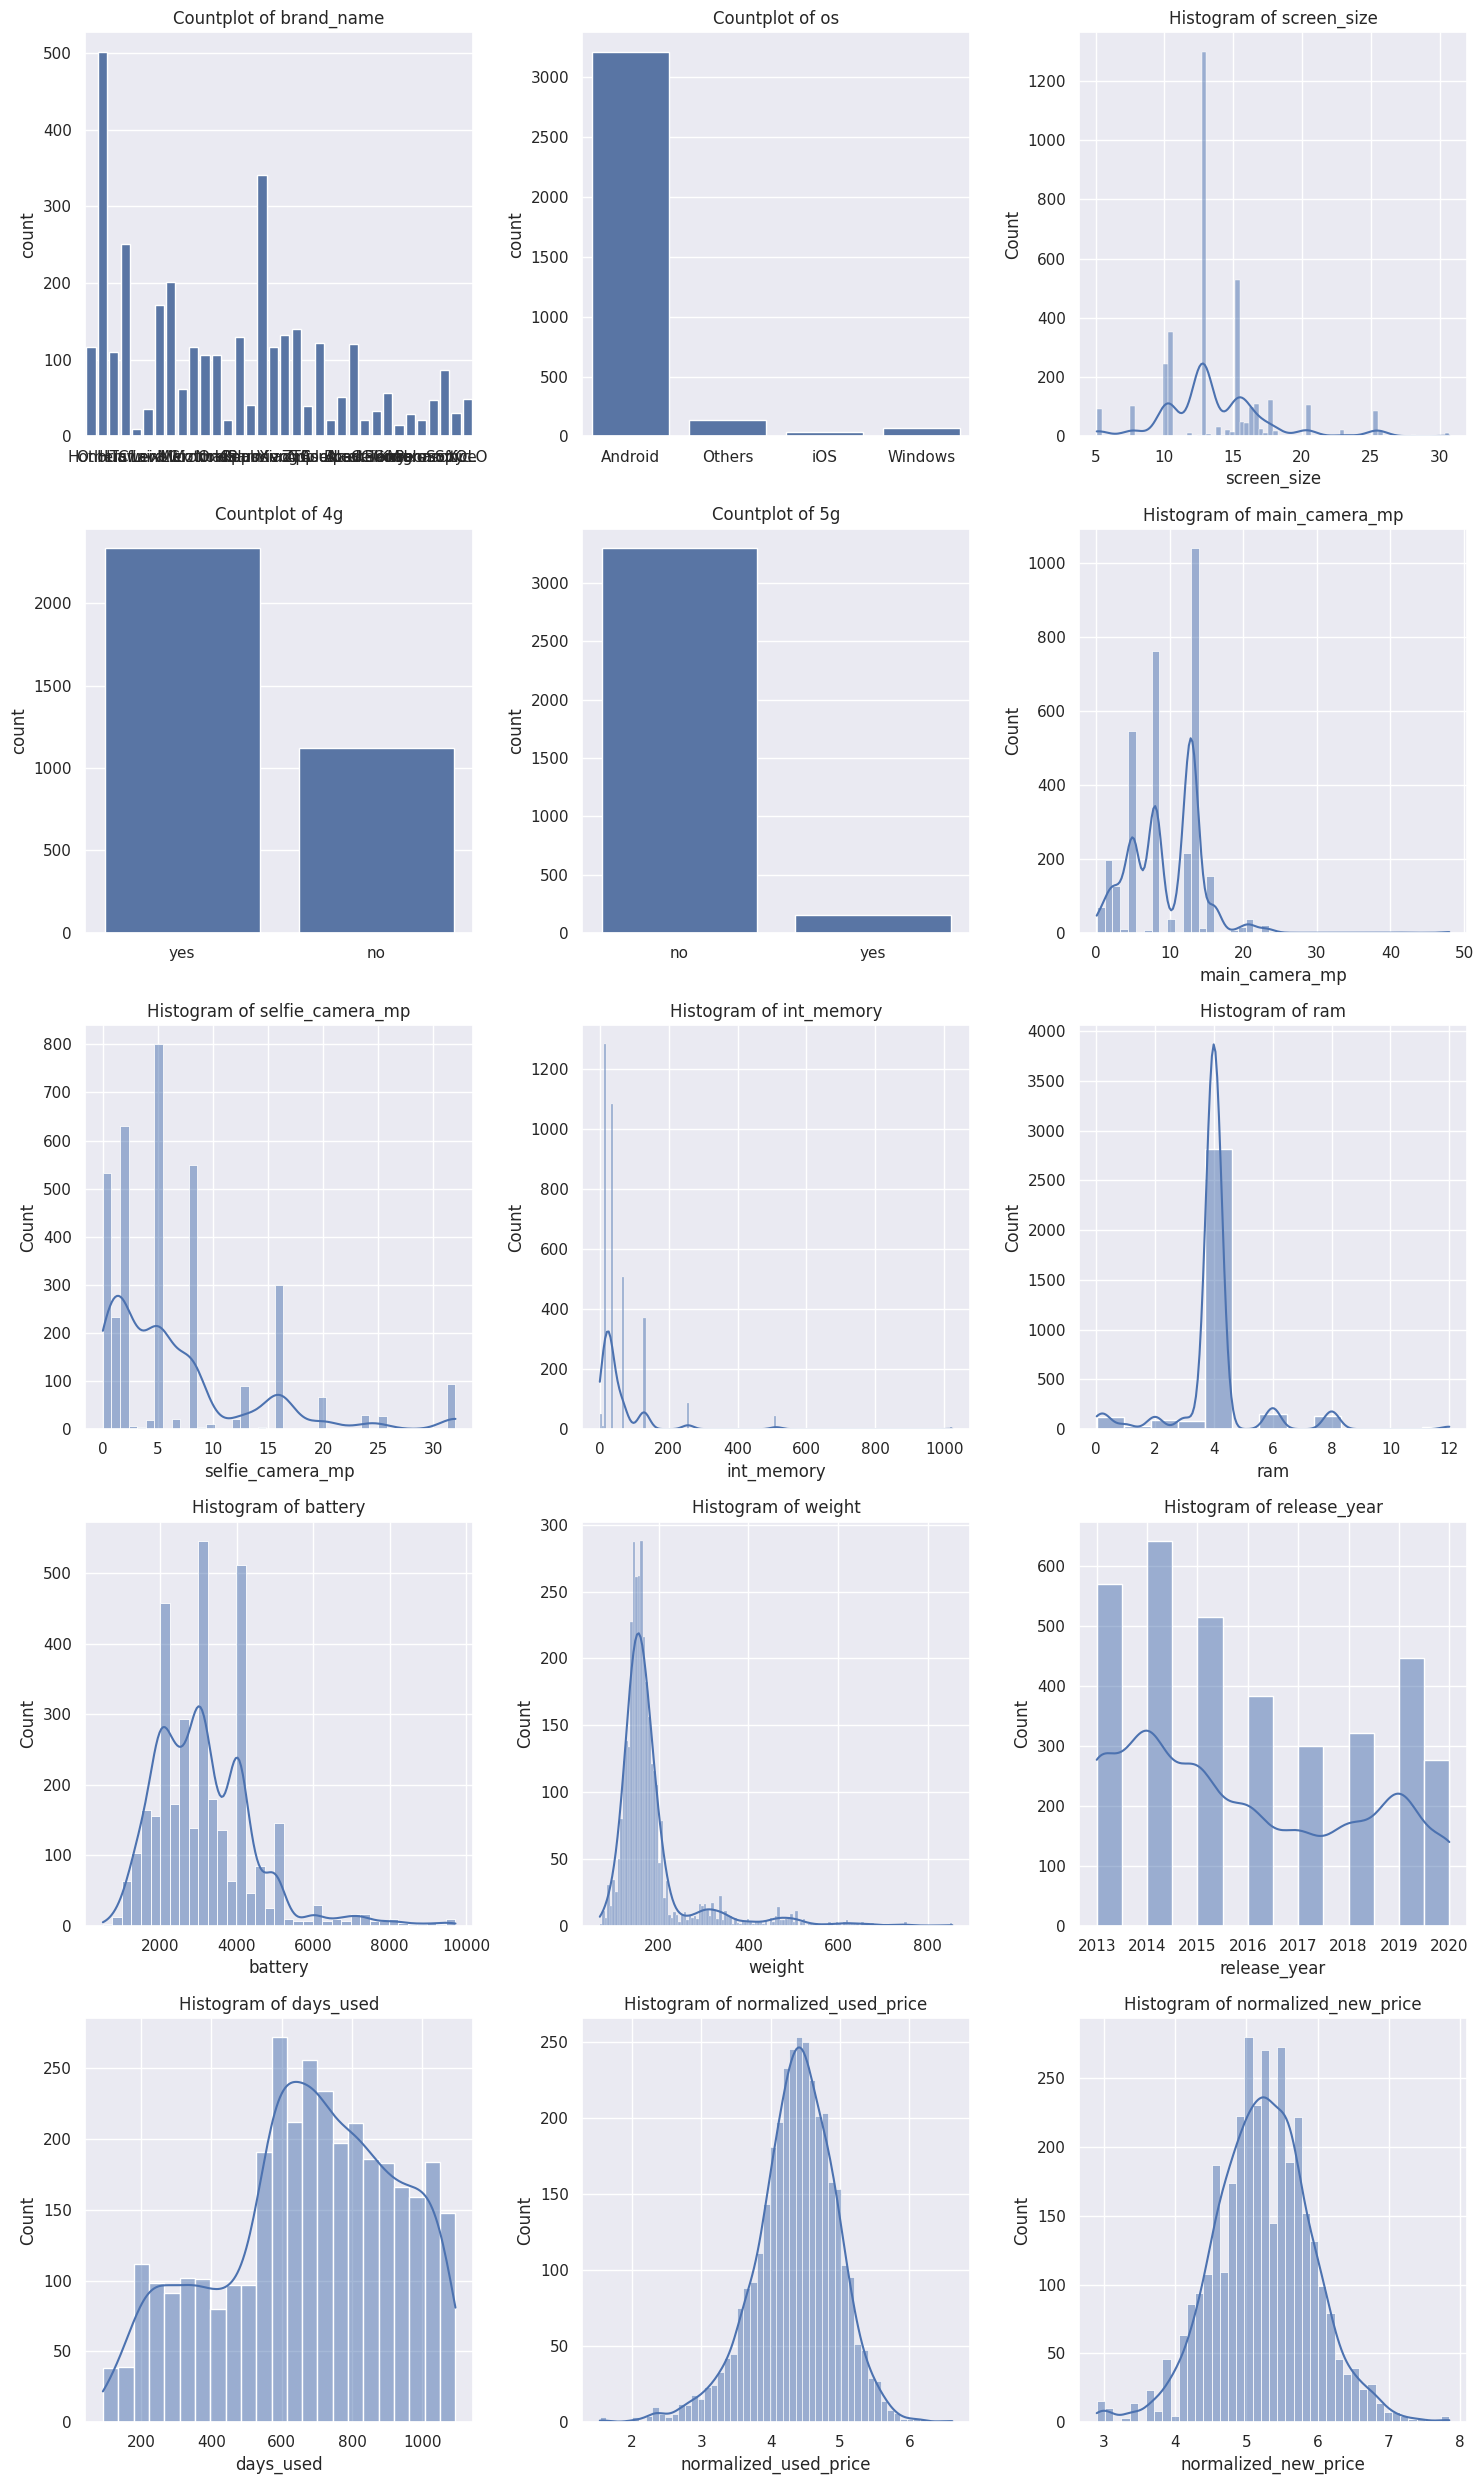

In [ ]:
# Univariate exploration
num_plots = len(df1.columns)
num_cols = 3
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

for i, column in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols]
    if df1[column].dtype == 'object':
        sns.countplot(data=df, x=column, ax=ax)
        ax.set_title(f'Countplot of {column}')
        ax.set_xlabel(None)
    else:
        sns.histplot(data=df1, x=column, kde=True, ax=ax)
        ax.set_title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

Observations:
- Screen Size: The average screen size is 13.71 inches, with a standard deviation of 3.81 inches, indicating a moderate variation in screen sizes. The smallest screen size is 5.08 inches, and the largest is 30.71 inches.
- Main Camera Megapixels (MP): The main cameras have an average of 9.46 MP, with a wide range of quality from 0.08 MP to 48 MP, as indicated by the high standard deviation of 4.82 MP.
- Selfie Camera Megapixels (MP): The average MP for selfie cameras is lower at 6.55, with a very high standard deviation of 6.97 MP, suggesting a large disparity in selfie camera quality.
- Internal Memory: There's a significant average internal memory of 54.57 GB, but with a very high standard deviation of 84.97 GB, indicating some devices have exceptionally high memory capacities, up to 1024 GB.
- RAM: The devices seem to commonly have 4 GB of RAM, with a low standard deviation of 1.37 GB, suggesting most devices have similar RAM capacities.
- Battery: The average battery capacity is 3133.40 mAh, with a range from 500 mAh to 9720 mAh, showing a wide variety in battery sizes.
- Weight: Devices weigh an average of 182.75 grams, with a considerable range from 69 grams to 855 grams.
- Release Year: The average release year for the devices is 2015.97, with devices ranging from 2013 to 2020, indicating the data includes devices released over a span of 7 years.
- Days Used: On average, devices have been used for 674.87 days, with the least used device at 91 days and the most used at 1094 days, showing a wide range in the amount of use.
- Normalized Used Price: The average normalized used price is 4.36, with a relatively small standard deviation of 0.59, indicating used prices are fairly consistent.
- Normalized New Price: The average normalized new price is 5.23, with a standard deviation of 0.68, suggesting new prices are also fairly consistent but slightly higher than used prices.

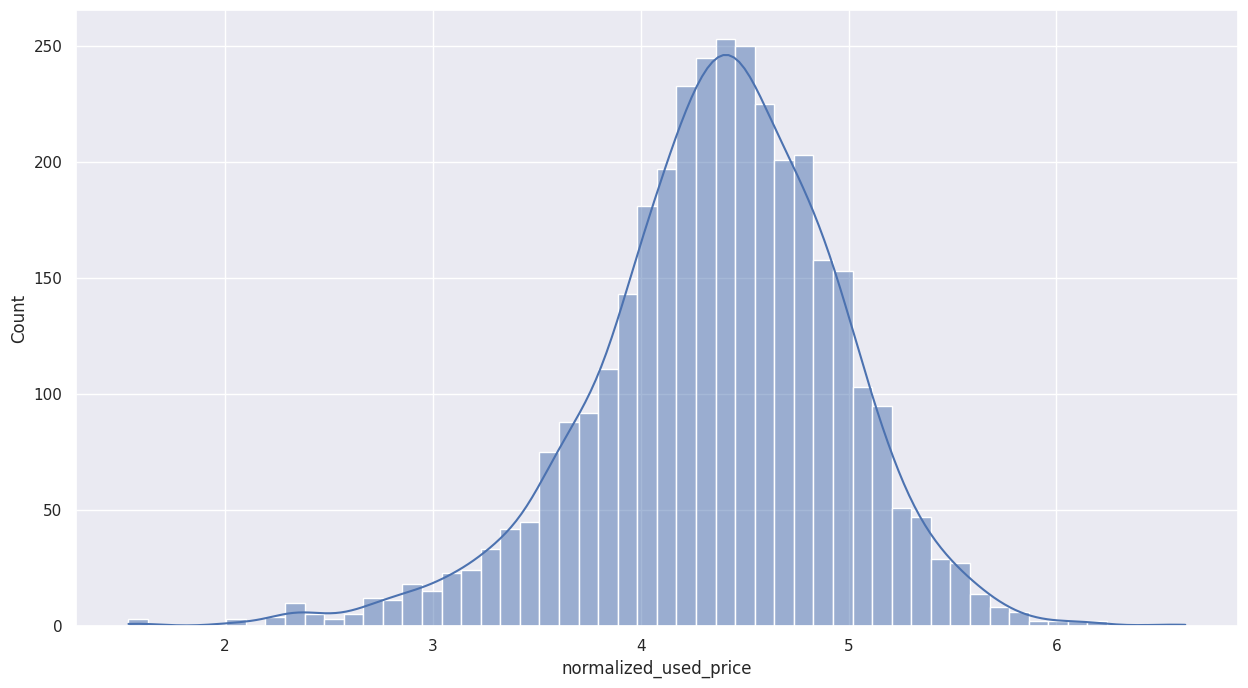

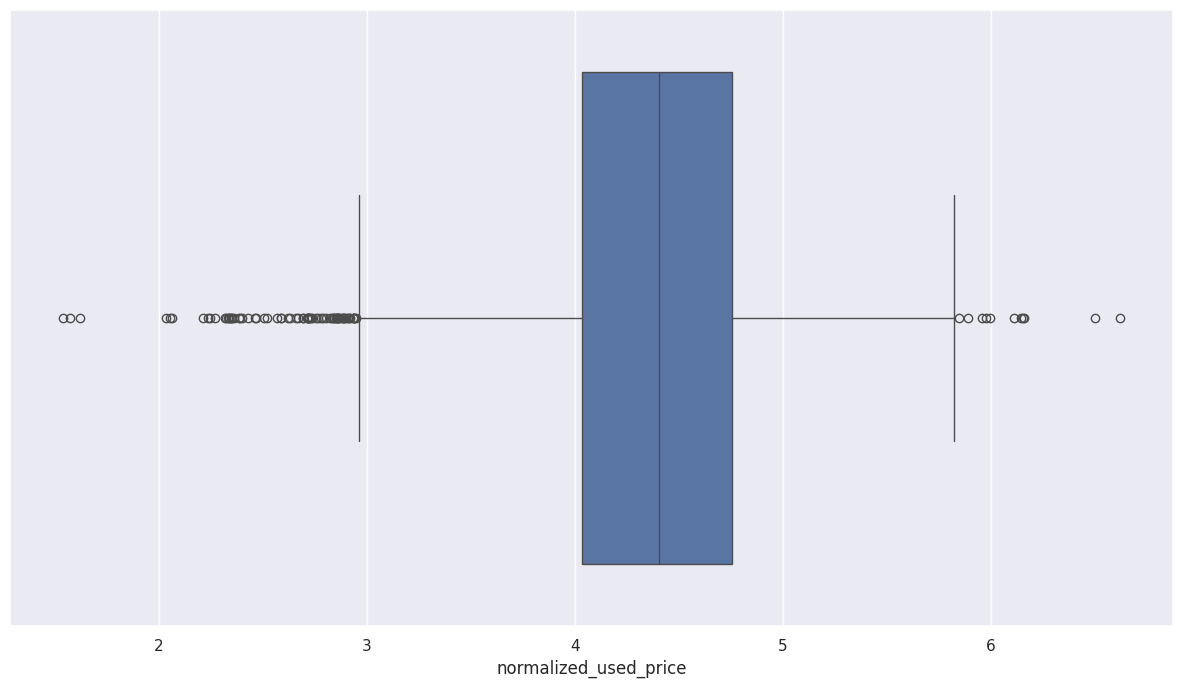

In [ ]:
# 1 What does the distribution of normalized used device prices look like?
sns.histplot(data=df1,x=df1['normalized_used_price'],kde=True)
plt.show()
sns.boxplot(data=df1,x=df1['normalized_used_price'])
plt.show()

The distribution of normalized used device prices appears to be generally normally distributed, with a mean of 5.23 and a median of 5.25. However, there are notable outliers present in the data, as shown in the boxplot. These outliers indicate that while most used phone prices are clustered around the central values, there are some prices that are significantly higher or lower than the majority. Additionally, when looking at the raw used phone prices, the distribution is right-skewed, indicating that there are more expensive used phones compared to cheaper ones. The mean used phone price is around 110 euros, while the median is around 75 euros. This skewness and the presence of outliers suggest that used phones can vary significantly in price, with a tendency towards higher prices.

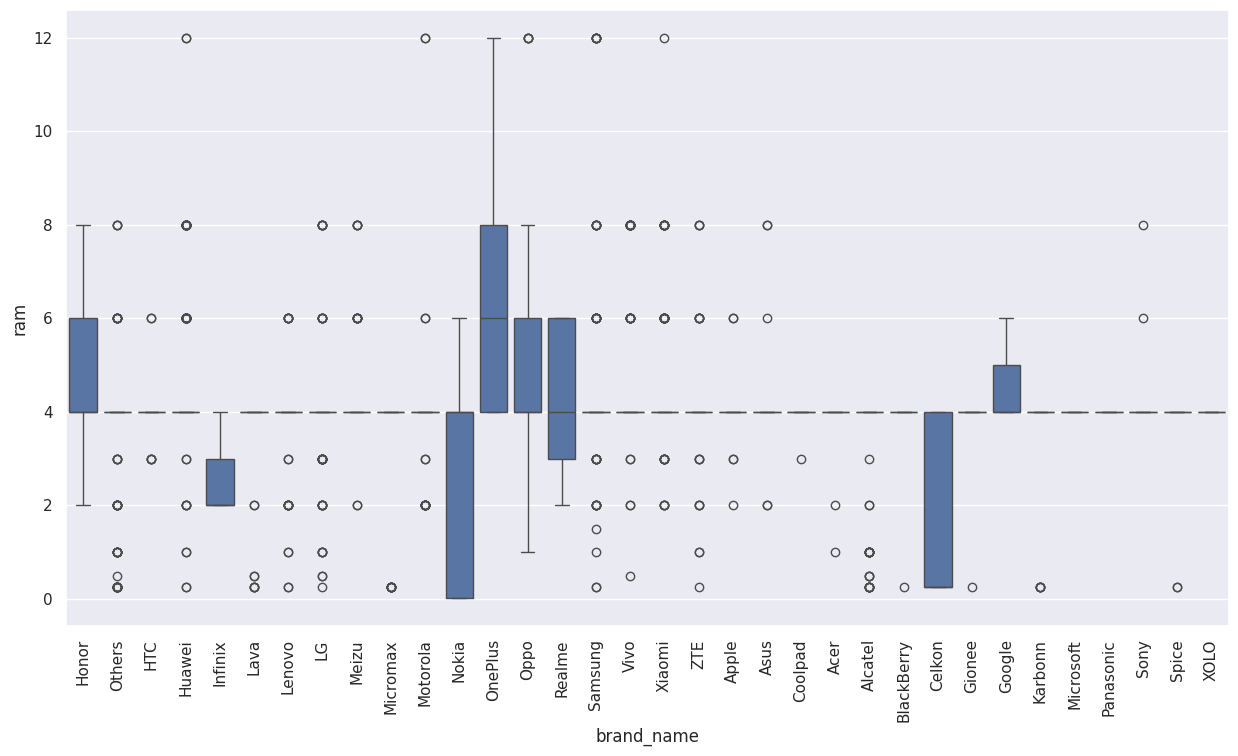

In [ ]:
# 2. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
sns.boxplot(data=df1,x= df1['brand_name'],y=df1['ram'])
plt.xticks(rotation = 90)
plt.show()

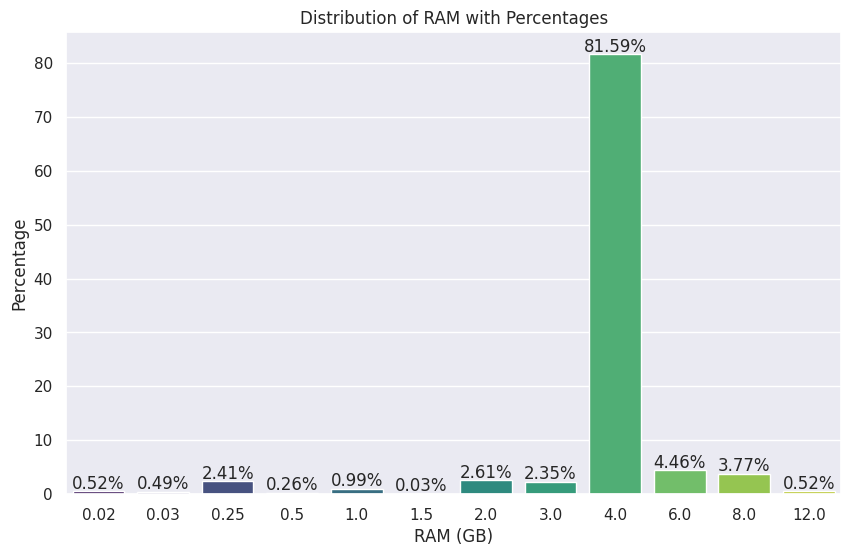

In [ ]:
# Plot barplot of ram with percentage showing on each bar
# Calculate the percentage of each RAM category
ram_counts = df1['ram'].value_counts(normalize=True) * 100
ram_counts = ram_counts.sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ram_counts.index, y=ram_counts.values, palette='viridis')

# Annotate the bars with the percentage values
for index, value in enumerate(ram_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

# Add labels and title
plt.xlabel('RAM (GB)')
plt.ylabel('Percentage')
plt.title('Distribution of RAM with Percentages')

# Show the plot
plt.show()

Newly established brands tend to offer devices with higher amounts of RAM. For example, OnePlus devices have a minimum RAM of around 4 GB, a maximum RAM of around 8 GB, and a median RAM of approximately 6 GB. In contrast, older brands generally offer devices with lower RAM capacities. Brands such as Infinix, Nokia, and Celkon typically show much lower RAM configurations.

In [ ]:
#3. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
# create a separated dataframe for batteries with more than 4,500 mAh, and register how many we have
df2 = df1[df1['battery'] > 4500]
df2.shape

(341, 15)

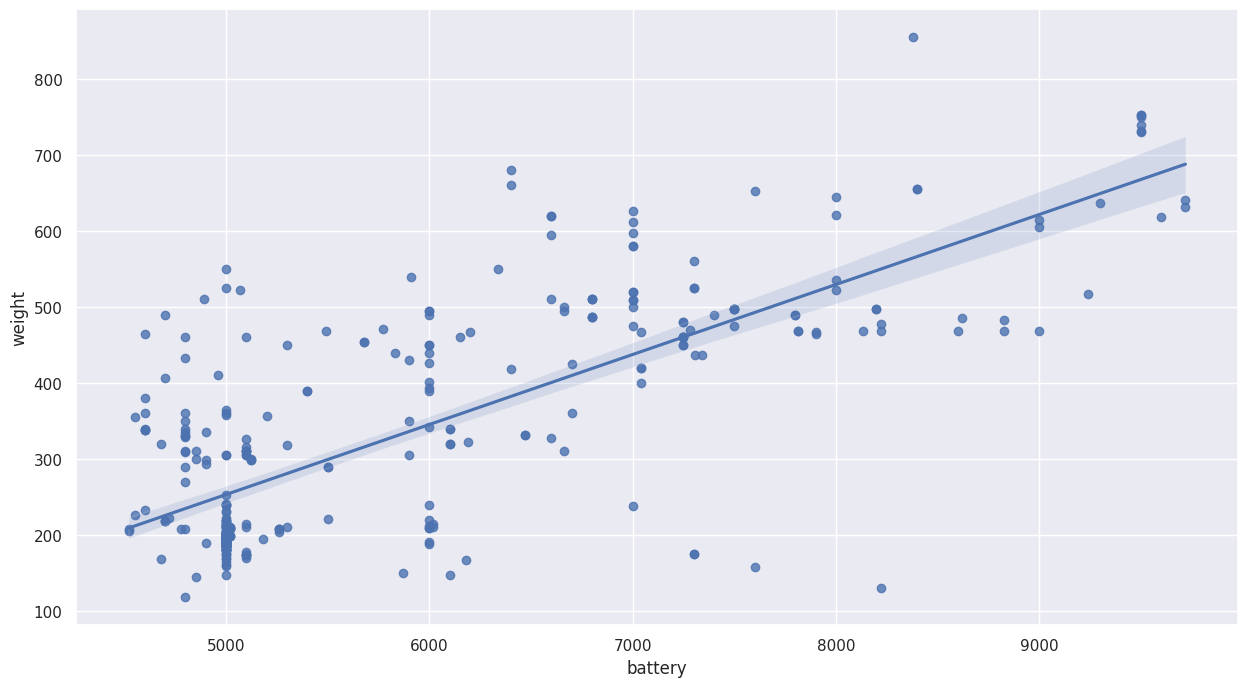

array([[1.        , 0.75762163],
       [0.75762163, 1.        ]])

In [ ]:
sns.regplot(data=df2,x=df2['battery'],y=df2['weight'])
plt.show()
np.corrcoef(x=df2['battery'],y=df2['weight'])

In this dataset, 341 devices feature batteries exceeding 4,500 mAh. The correlation between battery capacity and weight stands at approximately 0.76, indicating a strong positive relationship. This suggests that as battery size increases, so does the device weight by around 76%. However, an intriguing anomaly arises from the correlation chart: certain devices boasting battery capacities surpassing 7,000 mAh exhibit unexpectedly low weights. This discrepancy raises concerns about potential data errors within the dataset.

In [ ]:
#4. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
# create a separated dataframe for devices with a screen size larger than 6 inches
df3 = df1[df1['screen_size']>6*2.54]
df3.shape

(1099, 15)

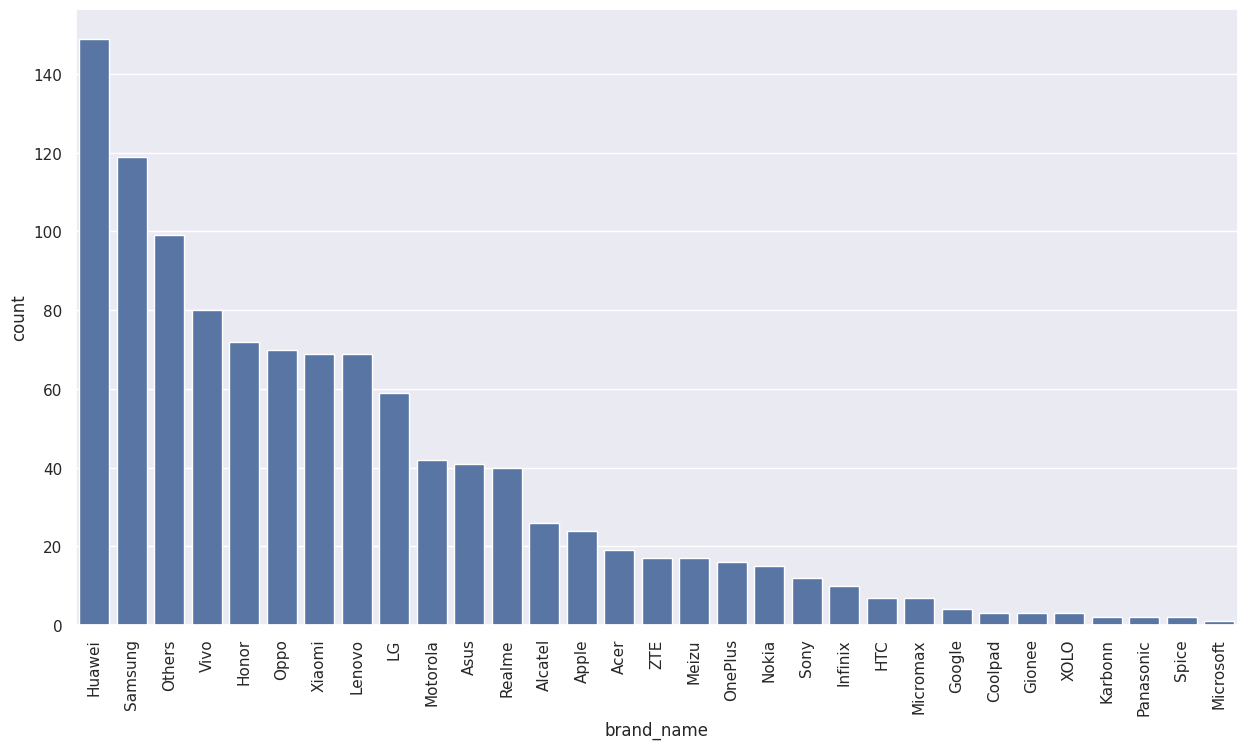

In [ ]:
sns.countplot(data=df3,x=df3['brand_name'],order=df3['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Across different brands in this dataset, there are 1099 devices featuring a screen size of 9 inches (or 9 * 2.54 cm). Huawei leads with the highest number of devices with big screen sizes, totaling around 149, followed closely by Samsung with approximately 119 devices. Notably, there are around 99 devices with large screen sizes that lack a specified brand name.

In [ ]:
#5. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
# create a separated dataframe for devices offering greater than 8 MP selfie cameras
df4 = df1[df1['selfie_camera_mp']>8]
df4.shape

(655, 15)

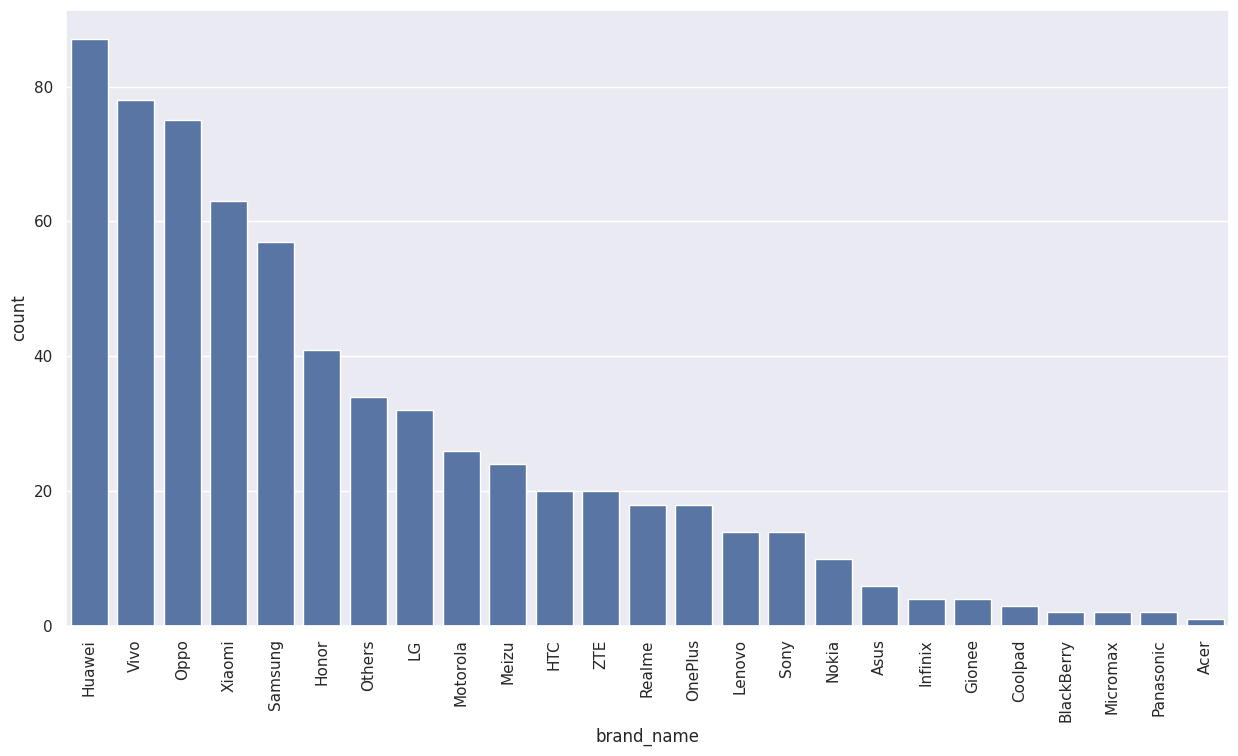

In [ ]:
sns.countplot(data=df4,x=df4['brand_name'],order=df4['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In this dataset, there are 655 devices equipped with selfie cameras boasting more than 8 MP. Huawei stands out with the highest number of such devices, totaling around 87, followed closely by Vivo with approximately 78 offerings.

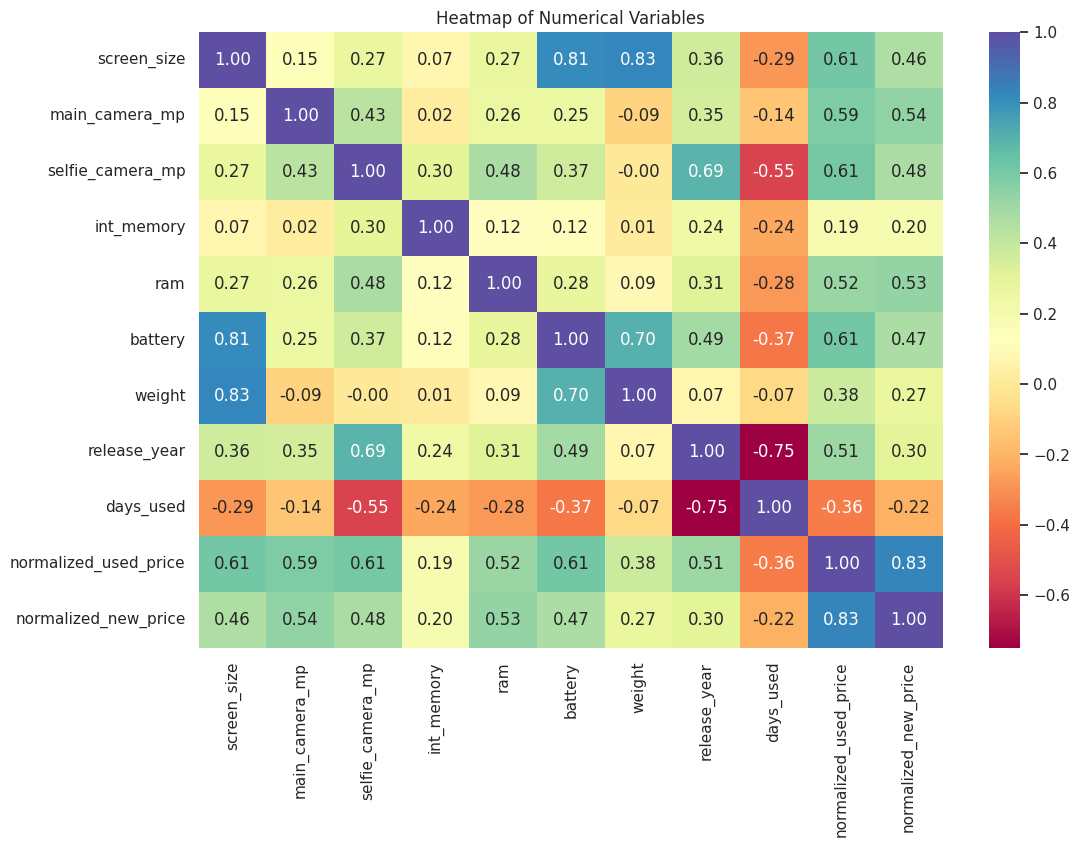

In [ ]:
#6. Which attributes are highly correlated with the normalized price of a used device?
# Creating a heatmap for the numerical variables in the dataframe
numeric_df = df1.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Spectral', fmt=".2f")
plt.title("Heatmap of Numerical Variables")
plt.show()


Attributes highly correlated with the normalized price of a used device include:

- Battery and Screen_size are highly correlated
- Weight and screen size are highly correlated
normalized_new_price and normalized_used_price also show high correlation
- There is a negative correlation between days_used and selfie_camera
- There is a negative correlation between days_used and normalized_used_price

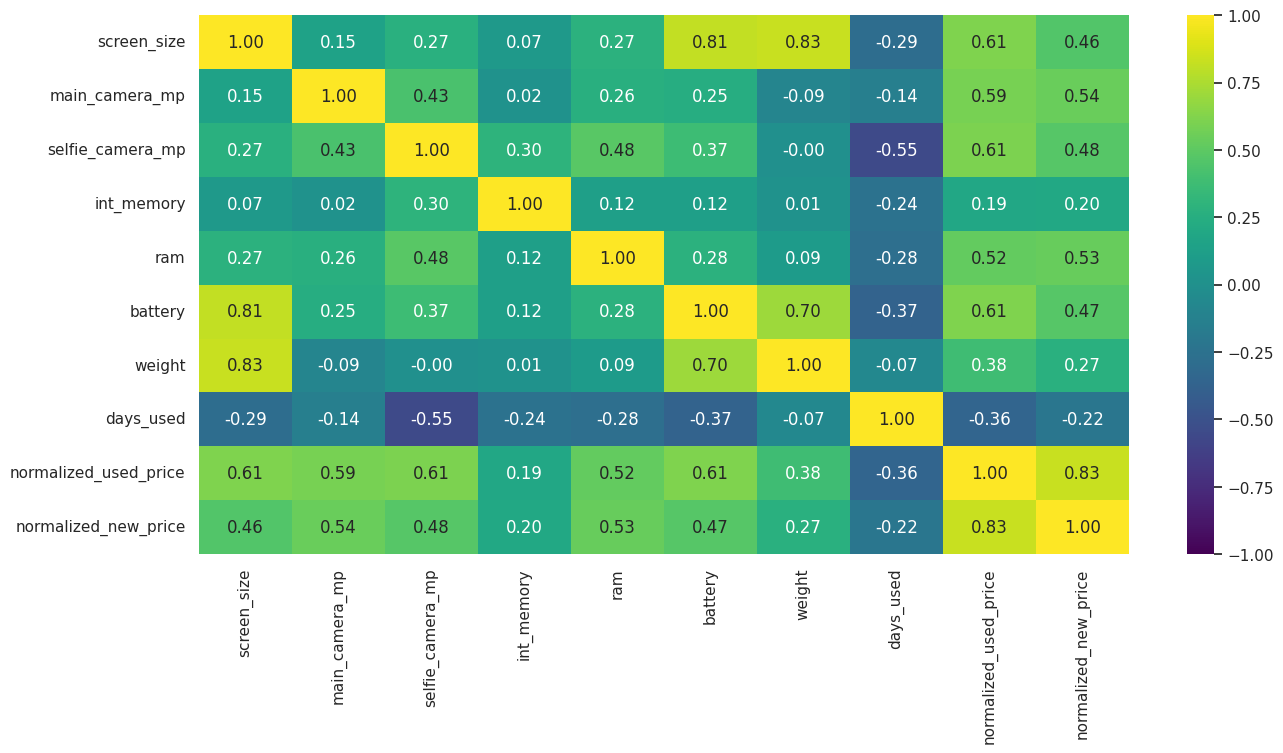

In [ ]:
# Bivariate exploration
num_col = df1.select_dtypes(include=np.number).columns.tolist()
num_col.remove("release_year")  # dropping the release_year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_col].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='viridis',
)
plt.show()

In [ ]:
# mean of phone ram in each brand
df1.groupby("brand_name")["ram"].mean()

brand_name
Acer          3.901961
Alcatel       3.407025
Apple         4.000000
Asus          4.049180
BlackBerry    3.829545
Celkon        1.613636
Coolpad       3.954545
Gionee        3.933036
Google        4.533333
HTC           4.000000
Honor         4.603448
Huawei        4.655378
Infinix       2.600000
Karbonn       3.353448
LG            3.936567
Lava          3.277778
Lenovo        3.885965
Meizu         4.451613
Micromax      3.679487
Microsoft     4.000000
Motorola      3.943396
Nokia         2.420294
OnePlus       6.363636
Oppo          4.961240
Others        3.777888
Panasonic     4.000000
Realme        4.195122
Samsung       4.199413
Sony          4.069767
Spice         3.750000
Vivo          4.756410
XOLO          4.000000
Xiaomi        4.583333
ZTE           4.023214
Name: ram, dtype: float64

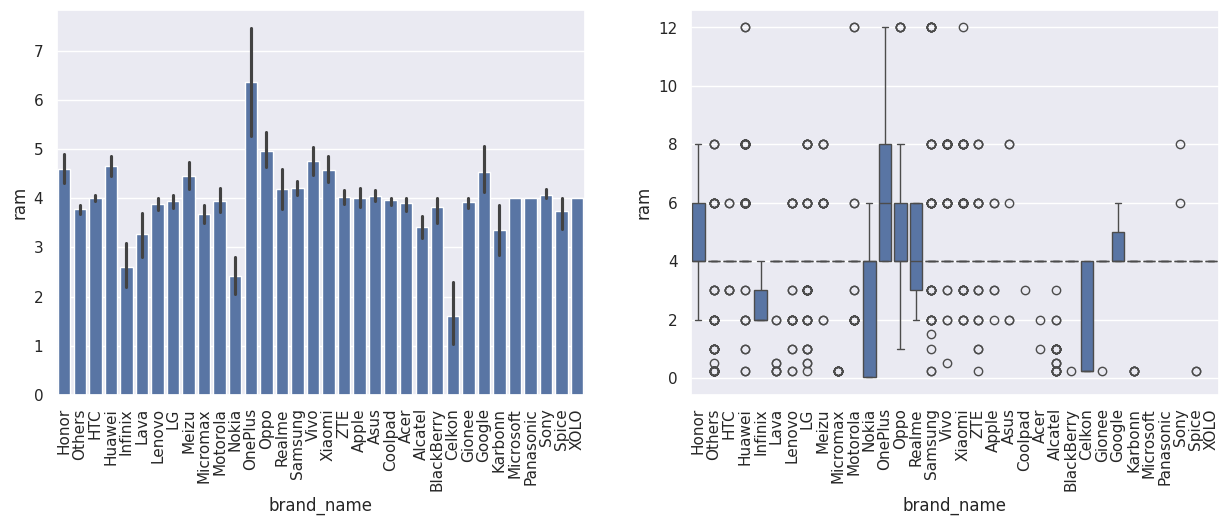

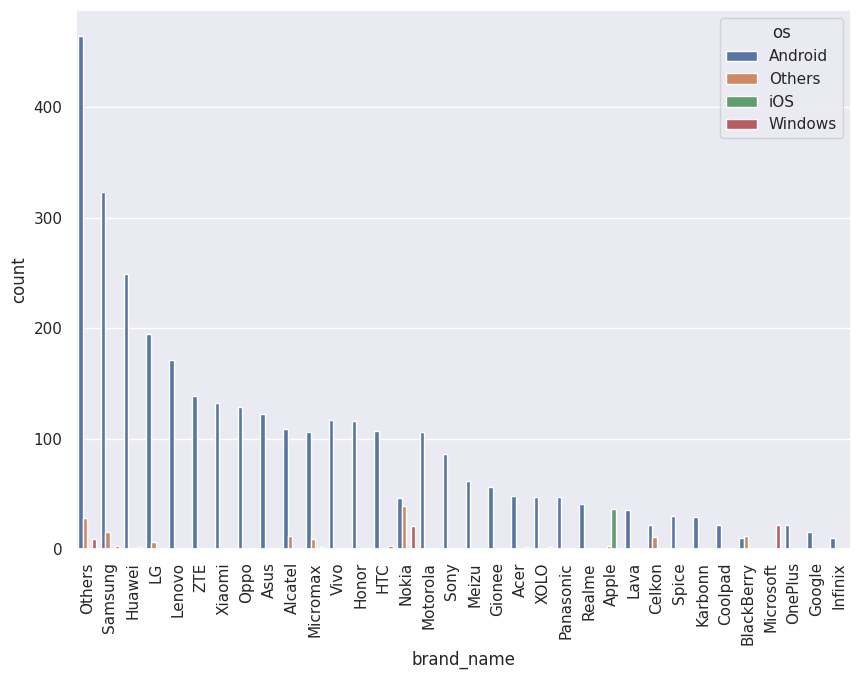

<Figure size 1000x700 with 0 Axes>

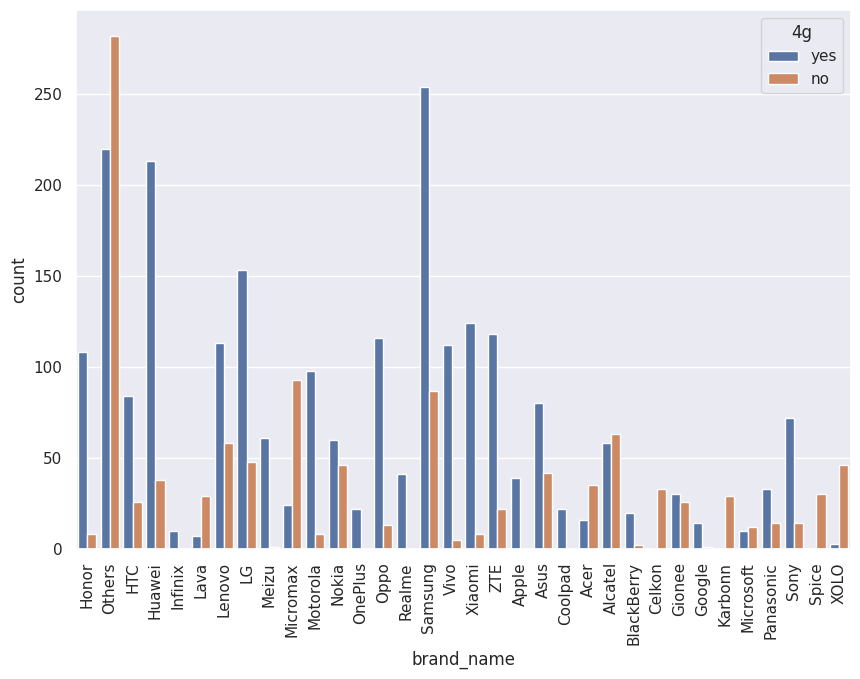

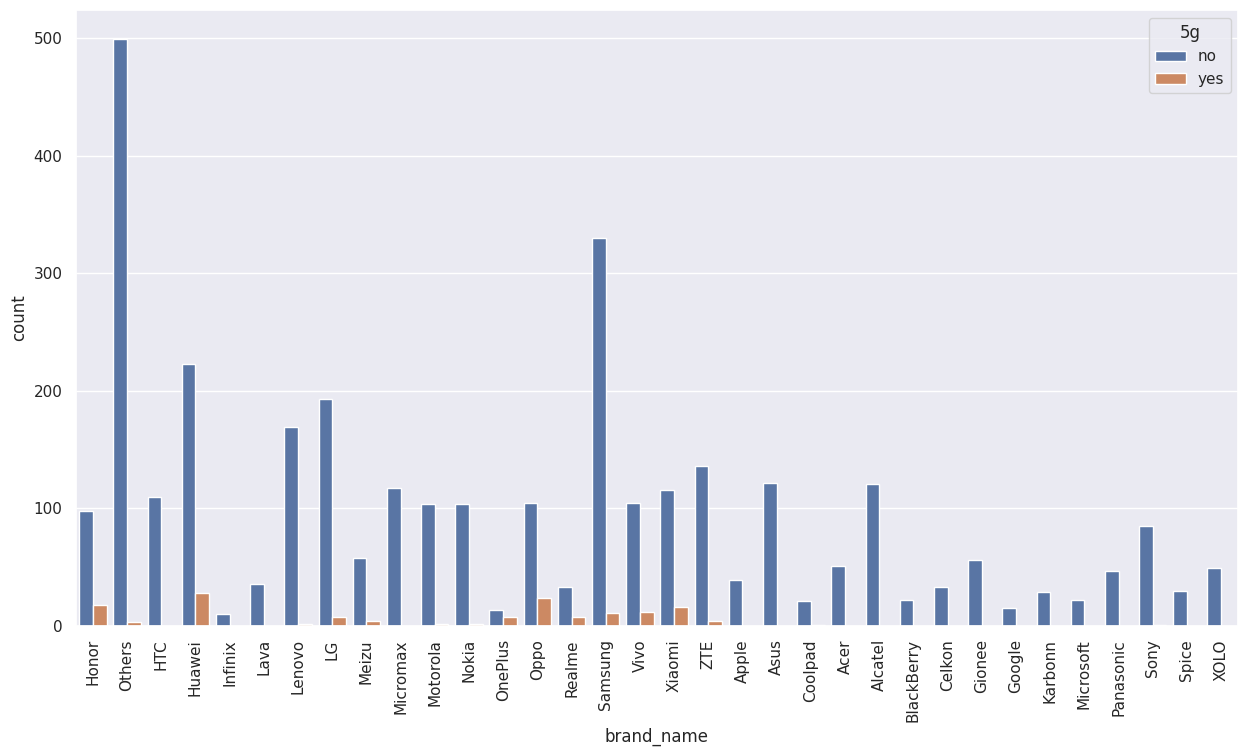

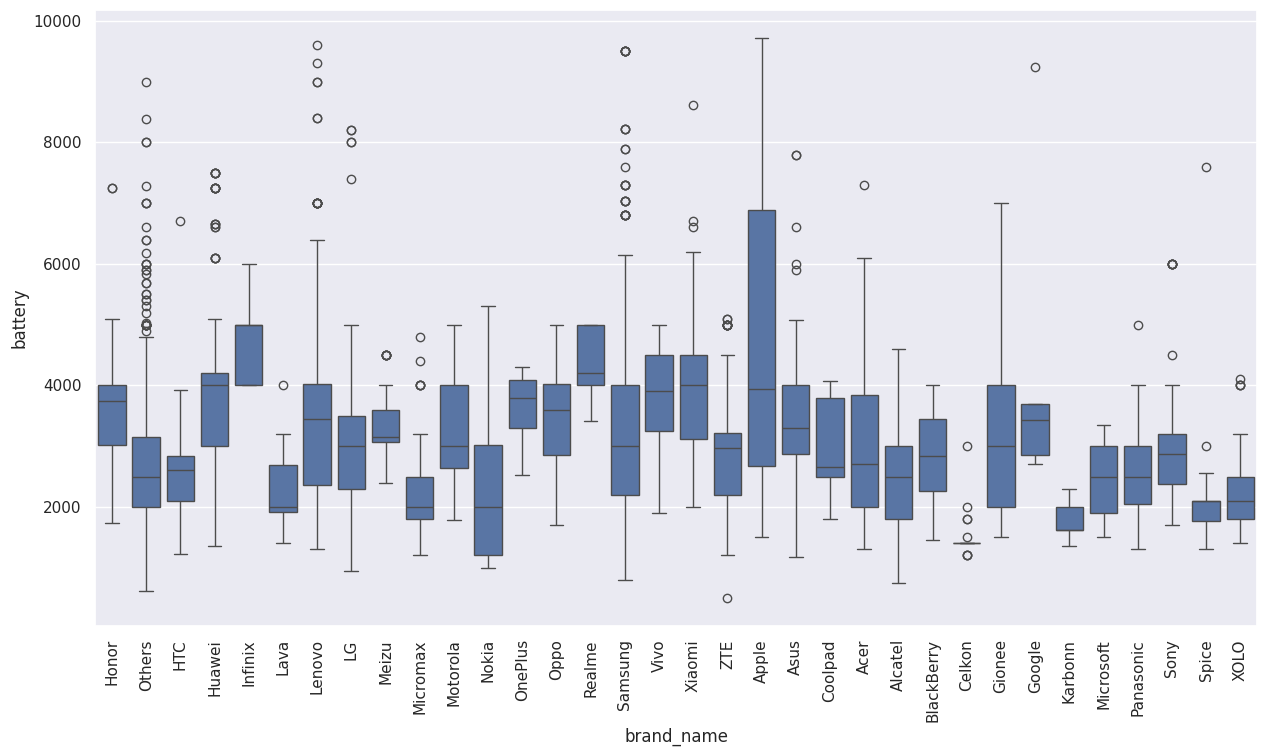

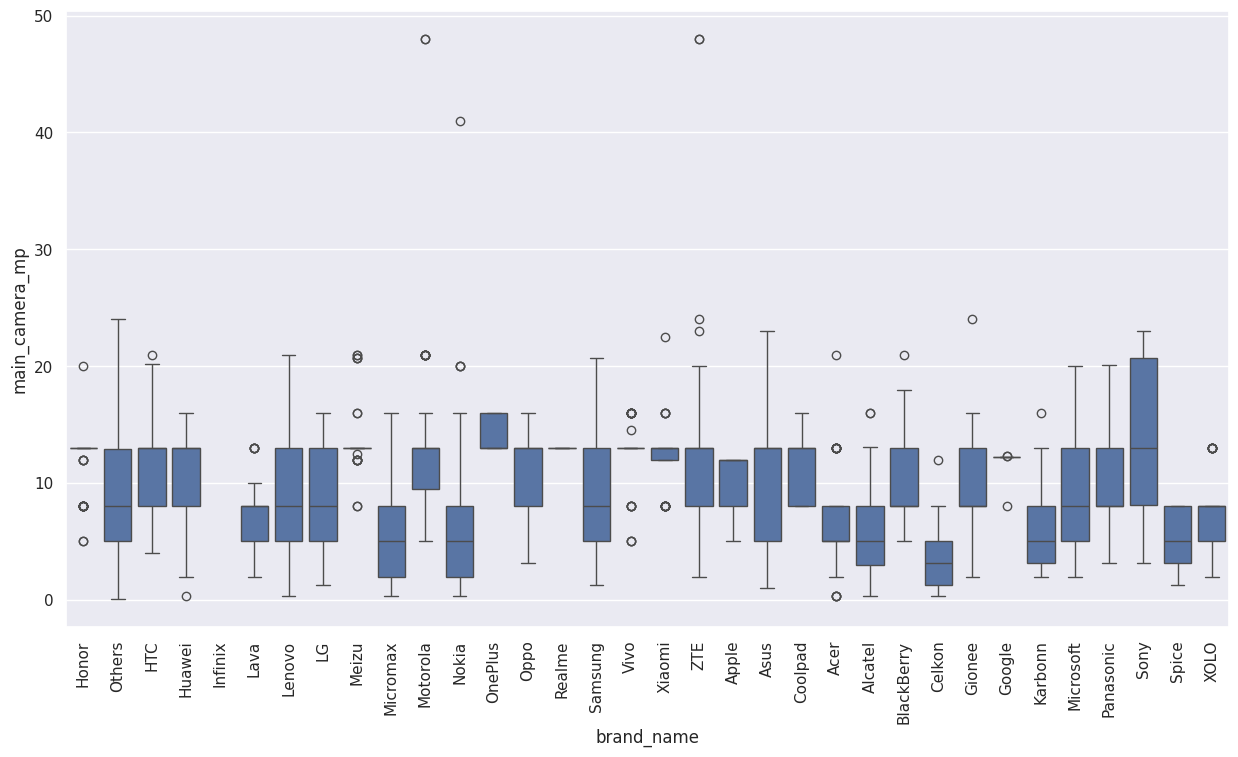

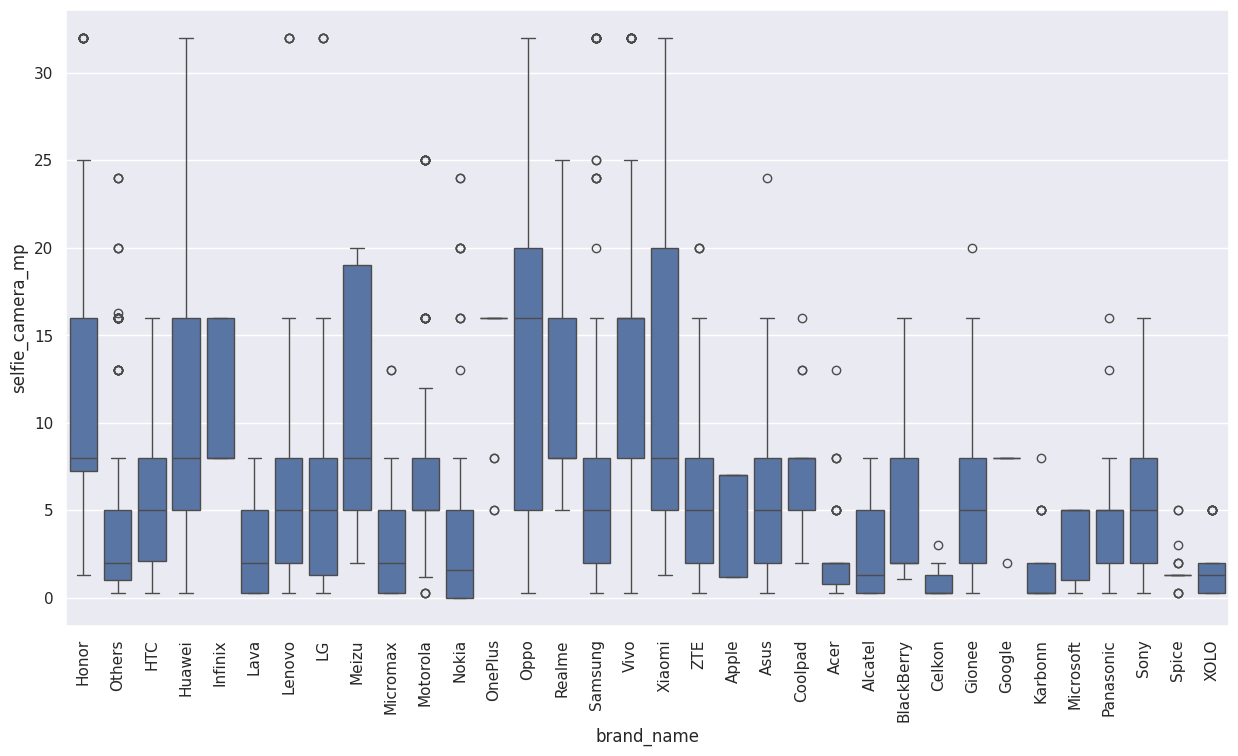

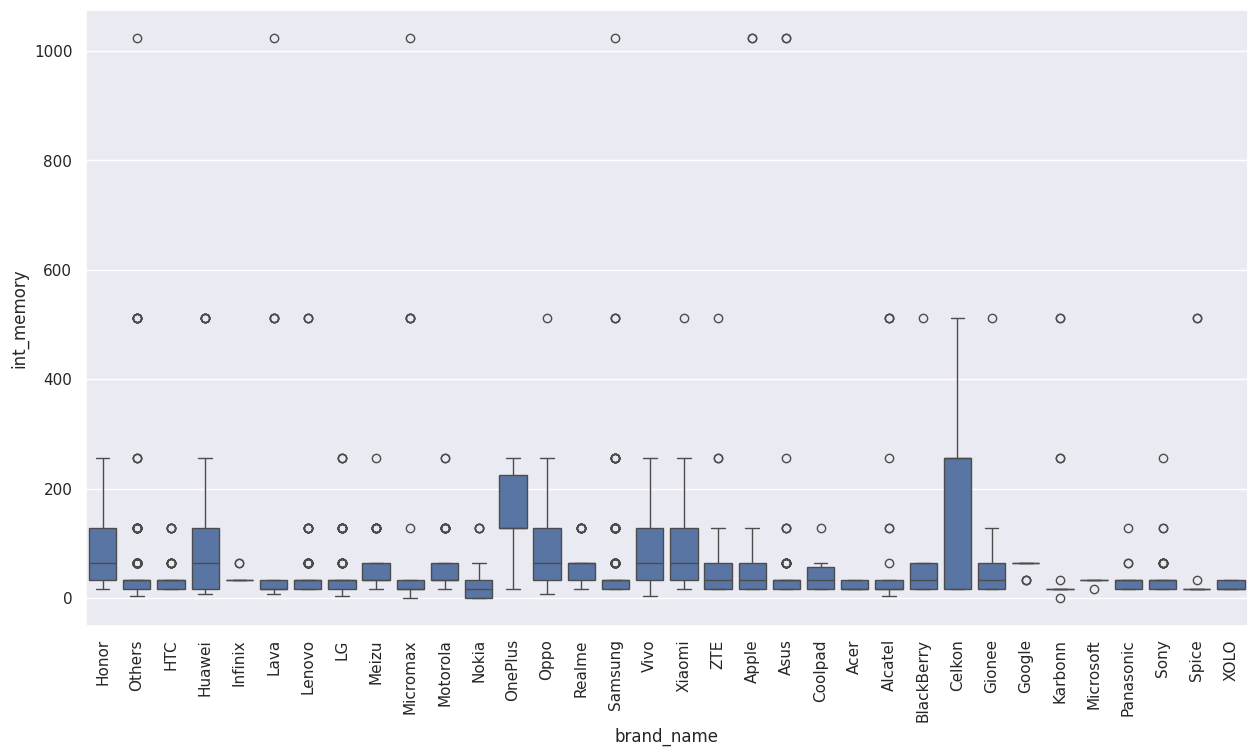

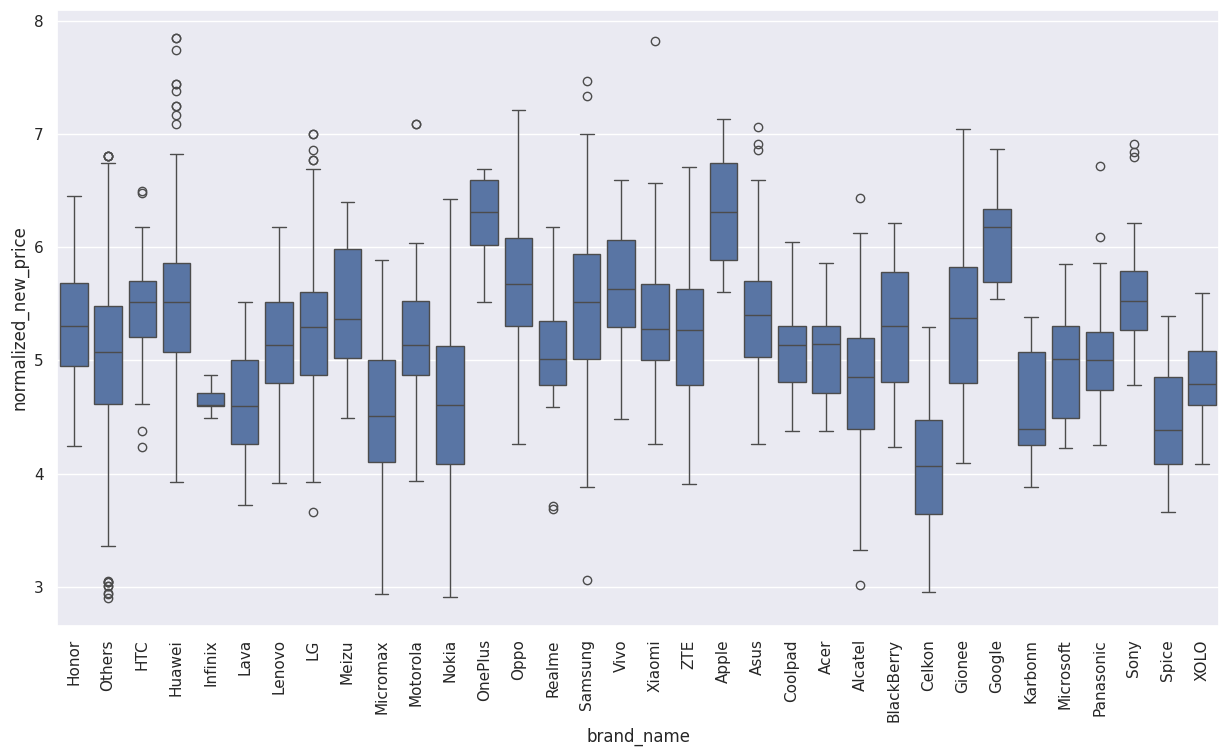

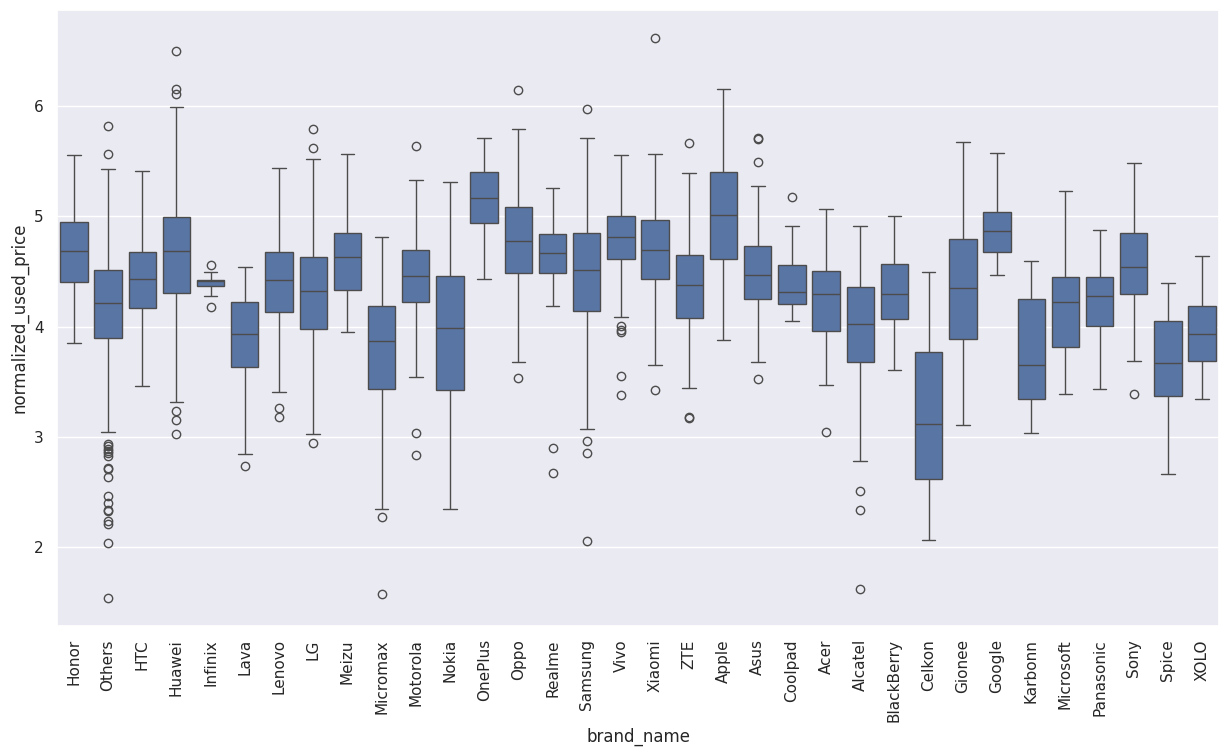

In [ ]:
#Brand name analysis
#RAM
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df1, y="ram", x="brand_name")
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.boxplot(data=df1, y="ram", x="brand_name")
plt.xticks(rotation=90)
#OS
plt.show()
plt.figure(figsize=(10,7))
sns.countplot(data=df1,x=df1['brand_name'],hue=df1['os'],order=df1['brand_name'].value_counts().index)
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10,7))
#4G, 5G
plt.figure(figsize=(10,7))
sns.countplot(data=df1,x=df1['brand_name'],hue=df1['4g'])
plt.xticks(rotation=90)
plt.show()
sns.countplot(data=df1,x=df1['brand_name'],hue=df1['5g'])
plt.xticks(rotation=90)
plt.show()
#Battery
sns.boxplot(data=df1,x=df1['brand_name'],y=df1['battery'])
plt.xticks(rotation=90)
plt.show()
#Main camera
sns.boxplot(data=df1,x=df1['brand_name'],y=df1['main_camera_mp'])
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=df1,x=df1['brand_name'],y=df1['selfie_camera_mp'])
plt.xticks(rotation=90)
plt.show()
#Int Memory
sns.boxplot(data=df1,x=df1['brand_name'],y=df1['int_memory'])
plt.xticks(rotation=90)
plt.show()
#Price
sns.boxplot(data=df1,x=df1['brand_name'],y=df1['normalized_new_price'])
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=df1,x=df1['brand_name'],y=df1['normalized_used_price'])
plt.xticks(rotation=90)
plt.show()

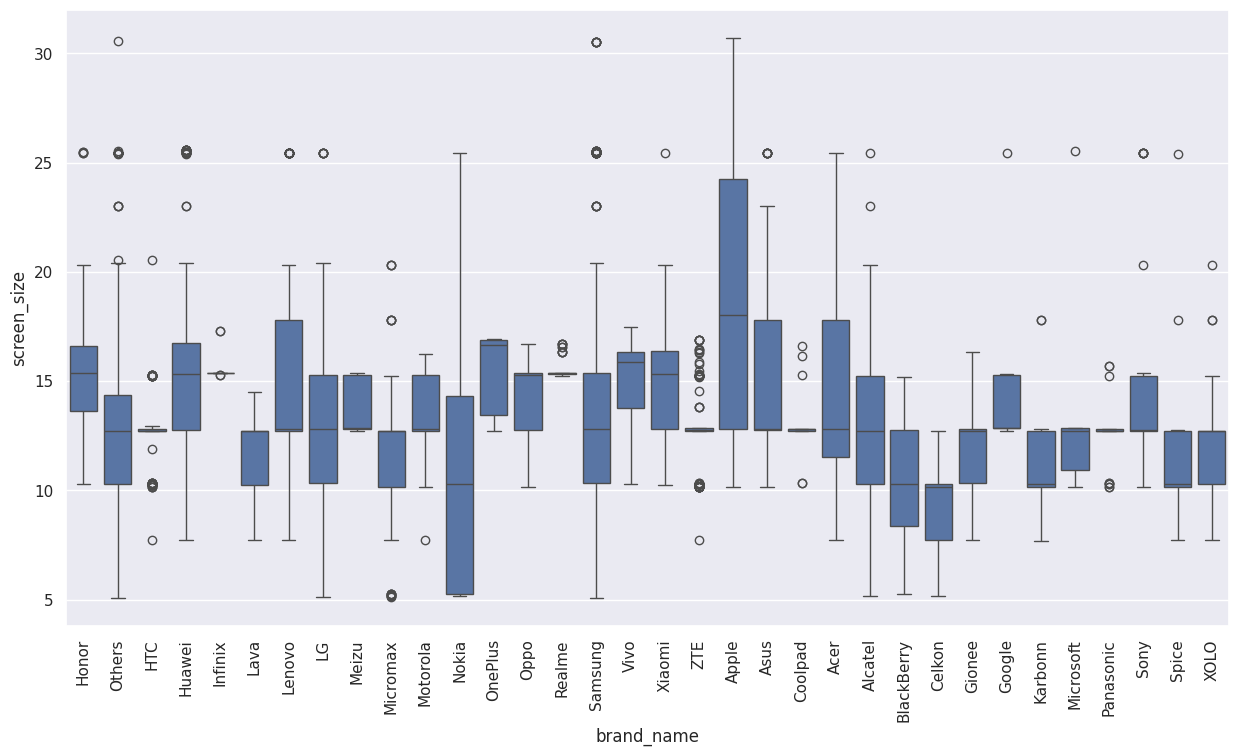

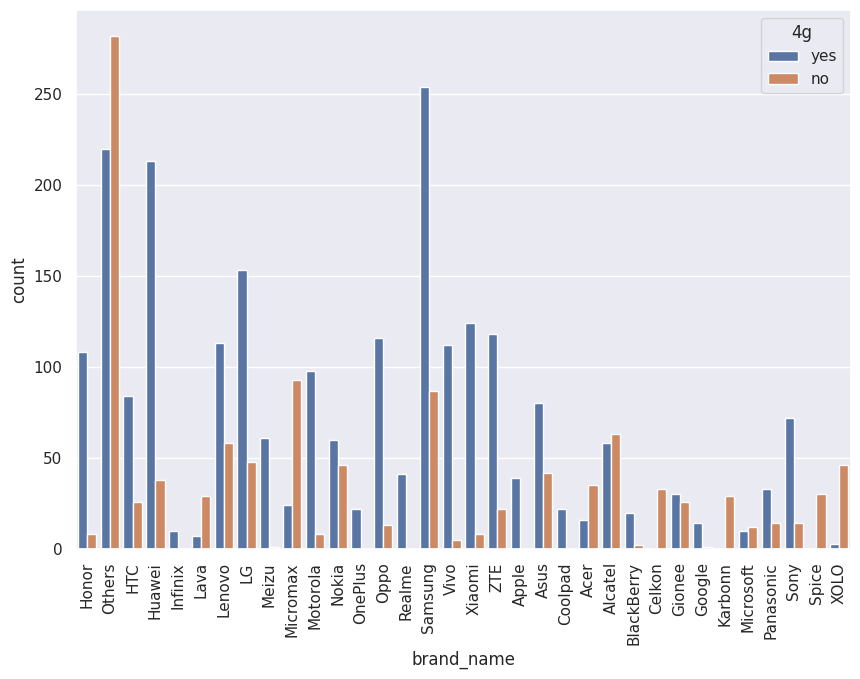

In [ ]:
#Brand vs screen size and 4G
sns.boxplot(data=df1,x=df1['brand_name'],y=df1['screen_size'])
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10,7))
sns.countplot(data=df1,x=df1['brand_name'],hue=df1['4g'])
plt.xticks(rotation=90)
plt.show()

Observations:

In the bivariate analysis of device attributes, several noteworthy correlations emerge. Firstly, normalized used prices exhibit a highly positive correlation with normalized new prices (83%), indicating that newer devices tend to command higher prices in the used market. Secondly, release year demonstrates a strong negative correlation with days used (-75%), suggesting that older devices tend to have been used for longer durations. Additionally, screen size shows notable positive correlations with both battery and weight (81% and 83%, respectively), while weight and battery are highly positively correlated (70%). This suggests that devices with larger screen sizes often feature larger batteries, resulting in increased weight. Moreover, days used displays negative correlations with selfie camera megapixels, RAM, and battery, implying that increased usage adversely affects device performance and hence its price. In terms of brand attributes, notable observations include Apple devices boasting the largest screen sizes and Sony having high main camera resolutions. Oppo devices stand out for their high-resolution selfie cameras, while Apple and Xiaomi exhibit median battery capacities. The relationship between battery capacity and weight is positively correlated, although some outliers exist where devices are unexpectedly heavy despite low battery capacities.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing value treatment**

In [ ]:
# analyzing missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# fill missing columns with the column median
col_to_fill = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

df1[col_to_fill] = df1[col_to_fill].apply(lambda x: x.fillna(x.median()), axis=0)

In [ ]:
# checking the number of missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

We see now there is no missing values

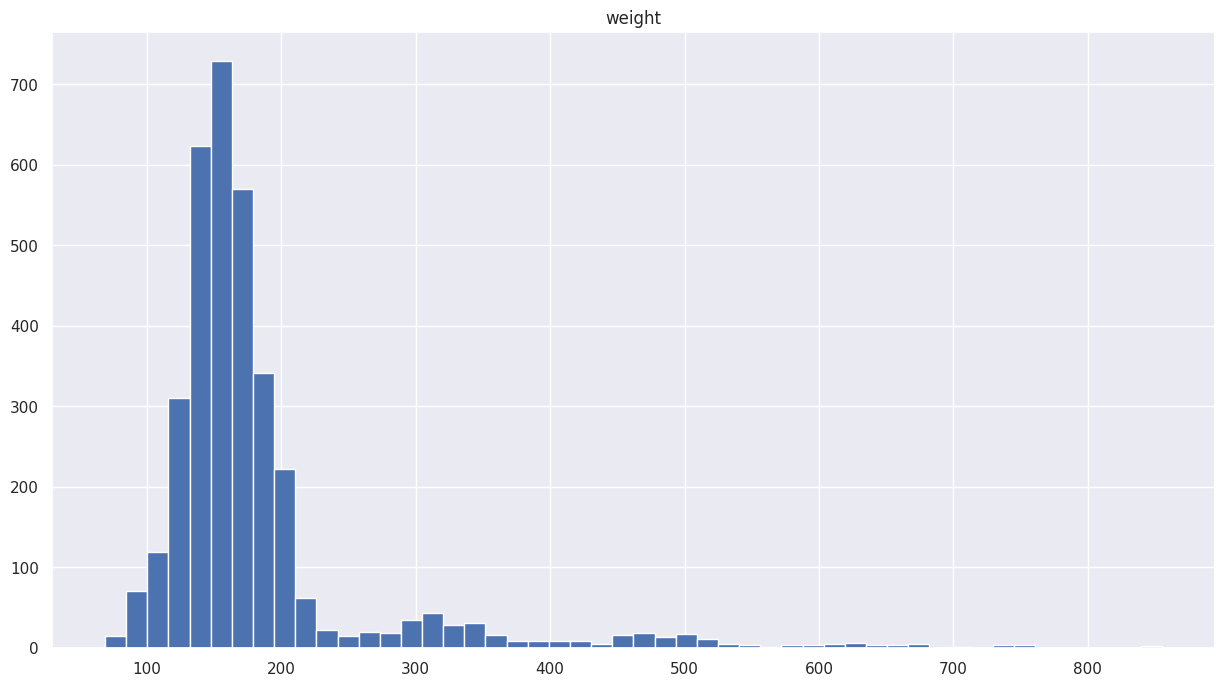

In [ ]:
# log transformation  of "weight" before log transformation
cols_to_log = ["weight"]

for colname in cols_to_log:
    plt.hist(df1[colname], bins=50)
    plt.title(colname)
    plt.show()

In [ ]:
# perform log transformation on the weight column and create a new column called "weight_log"
df1["weight_log"] = np.log(df1["weight"])
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


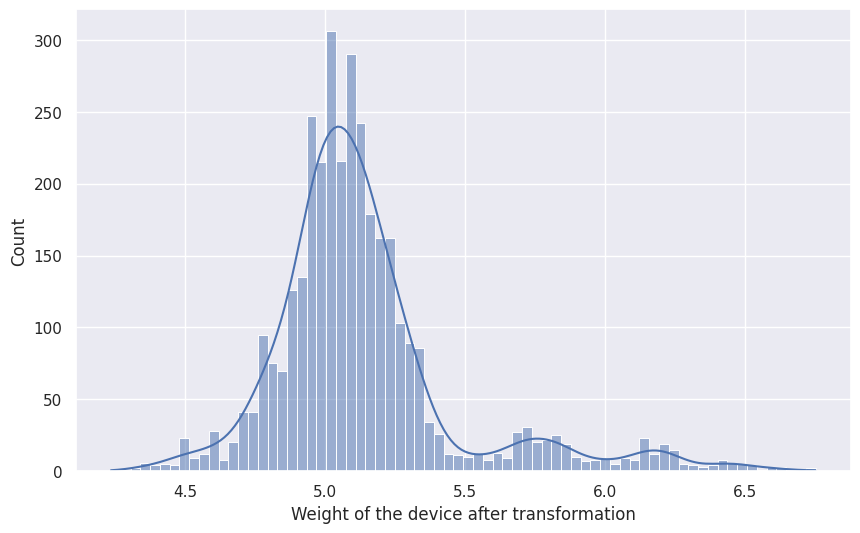

In [ ]:
# Plot the distribution of the "weight_log" column after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(df1["weight_log"], kde=True)
plt.xlabel("Weight of the device after transformation")
plt.show()

In [ ]:
# Drop the 'weight' column
df1= df1.drop(columns=['weight'])

# Display the resulting DataFrame to verify that the 'weight' column has been removed
print(df1)

     brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             8.0   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  release_year  days_used  \
0                  5.0        64.0  3.0   3020.0          2020        127   
1                 16.0       128.0  8.0  

In [ ]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220356


# Observations:
- The weight column distribution after log transformation its better than before normal distribution
- Its recommended to drop the weight column and leave the weight_log column

**Feature Engineering**

In order to enhance the dataset for building a supervised learning model, I will execute a transformation on the data. Specifically, I will create a new feature called years_since_release by calculating the difference between the baseline year of data collection, which is 2013, and the release_year of each device. This new feature will replace the release_year column, which I will remove from the dataset. The years_since_release feature will provide a clearer indication of each device’s age, offering a more directly relevant and intuitive metric for the model to learn from and make predictions. This step is crucial as it directly impacts the model’s ability to accurately interpret the age of devices as a factor in its analysis.

In [ ]:
# Create a copy of df1 and call it df_FE
df_FE = df1.copy()

# Baseline year
baseline_year = 2013

# Create the new column in years since the baseline year as float in df_FE
df_FE['years_since_baseline'] = (df_FE['release_year'] - baseline_year).astype(float)

# Drop the original column and rename the new column in df_FE
df_FE.drop(columns=['release_year'], inplace=True)
df_FE.rename(columns={'years_since_baseline': 'release_year'}, inplace=True)

# Display the resulting DataFrame
print(df_FE)

# Verify the data type of the new column
print(df_FE['release_year'].dtype)


     brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             8.0   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  days_used  \
0                  5.0        64.0  3.0   3020.0        127   
1                 16.0       128.0  8.0   4300.0        325   
2     

**Outlier detection**

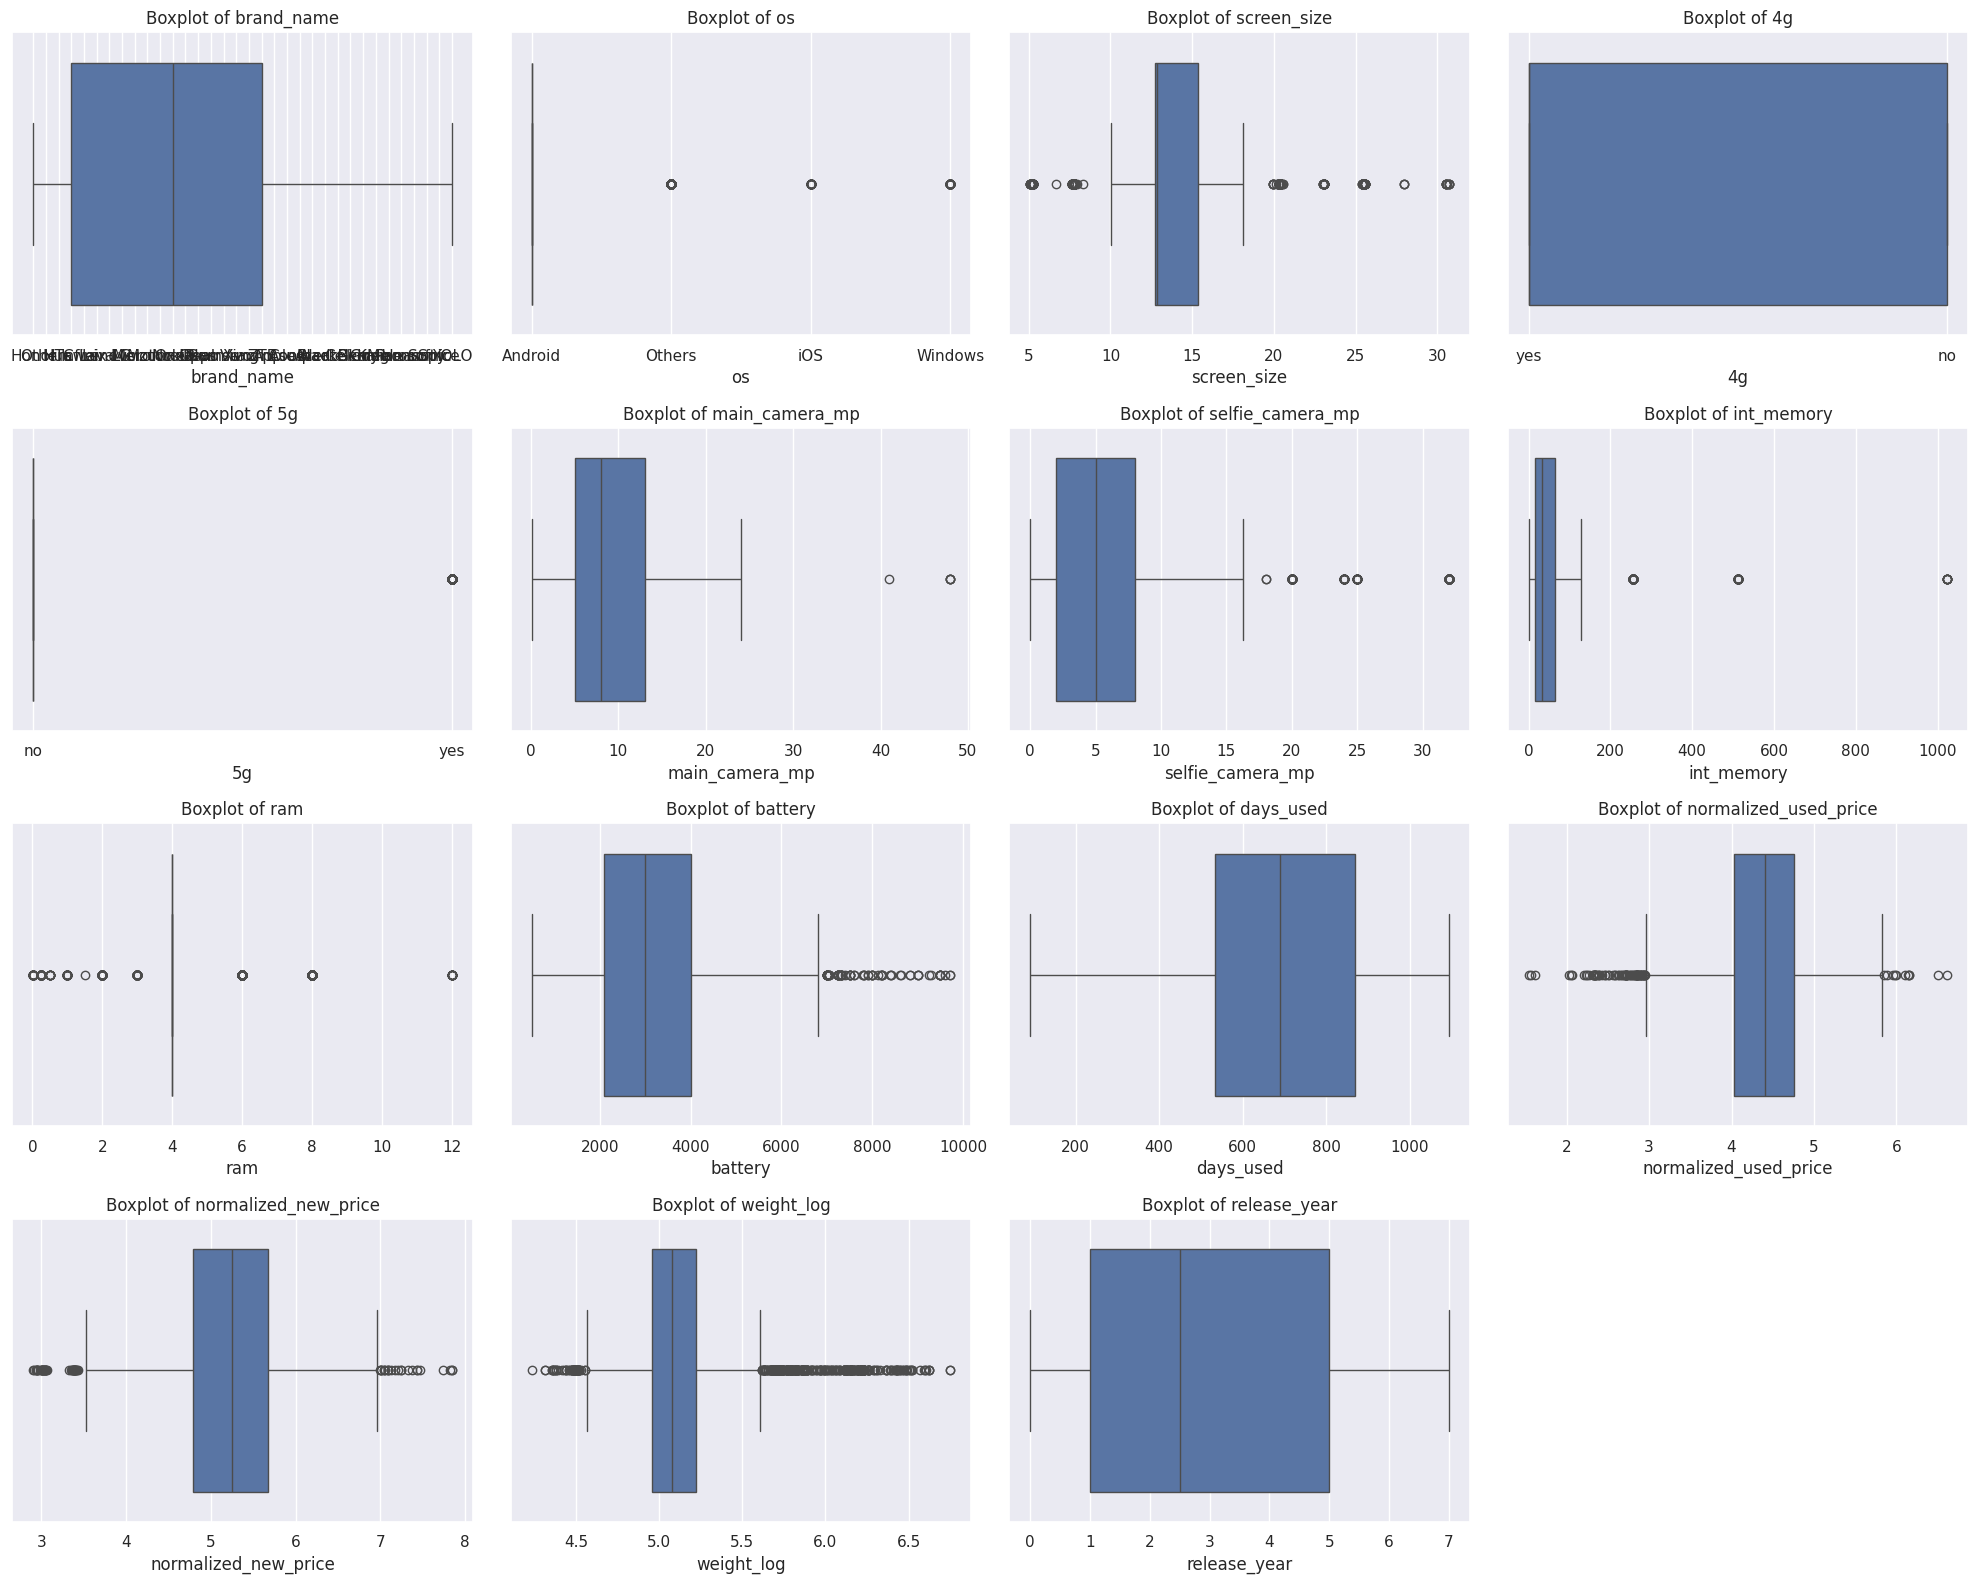

In [ ]:
# outlier detection using boxplot
# Set the number of subplots per row
subplots_per_row = 4

# Calculate the total number of rows needed
num_rows = len(df_FE.columns) // subplots_per_row + (len(df_FE.columns) % subplots_per_row > 0)

# Create a figure with subplots
plt.figure(figsize=(5 * subplots_per_row, 4 * num_rows))

# Plot each column in a subplot
for i, column in enumerate(df_FE.columns):
    plt.subplot(num_rows, subplots_per_row, i + 1)
    sns.boxplot(x=df_FE[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

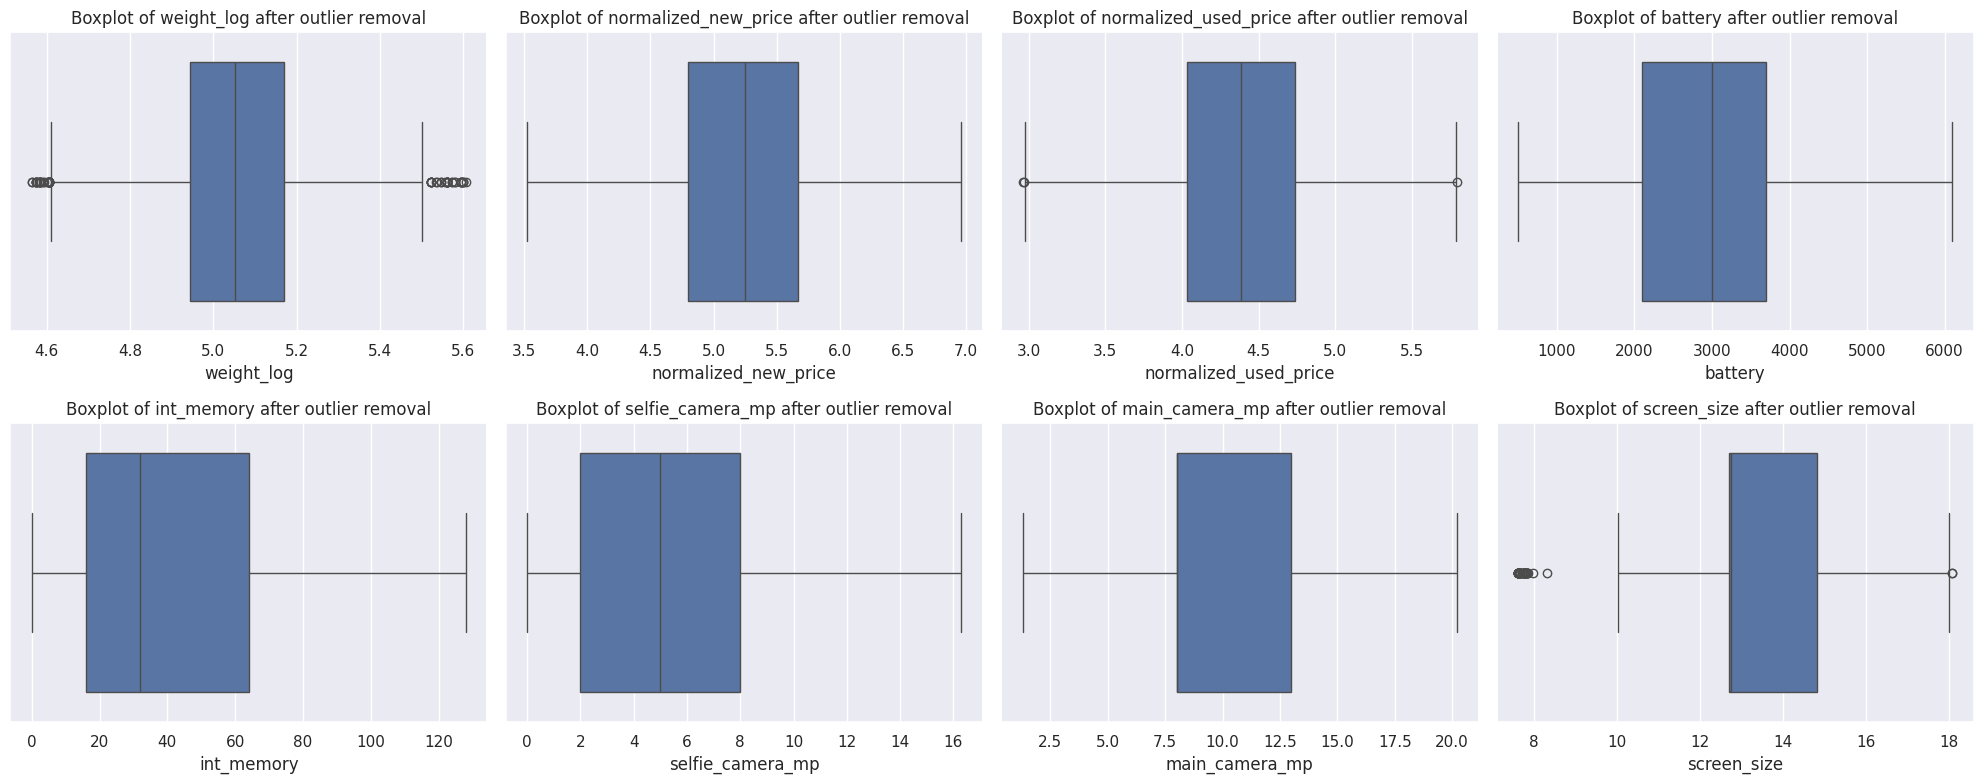

In [ ]:
# Creating a new DataFrame df_FEO without outliers
df_FEO = df_FE.copy()

# List of columns to check for outliers - relevant columns for outliers to be removed
columns_to_plot = ["weight_log", "normalized_new_price", "normalized_used_price", "battery",
                   "int_memory", "selfie_camera_mp", "main_camera_mp", "screen_size"]

# Set the number of subplots per row
subplots_per_row = 4

# Calculate the total number of rows needed
num_rows = len(columns_to_plot) // subplots_per_row + (len(columns_to_plot) % subplots_per_row > 0)

# Create a figure with subplots
plt.figure(figsize=(5 * subplots_per_row, 4 * num_rows))

# Remove outliers and plot each variable in a subplot
for i, column in enumerate(columns_to_plot):
    # Calculate IQR and determine bounds for outliers
    Q1 = df_FEO[column].quantile(0.25)
    Q3 = df_FEO[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering out the outliers
    df_FEO = df_FEO[(df_FEO[column] >= lower_bound) & (df_FEO[column] <= upper_bound)]

    # Plotting the variable after outlier removal
    plt.subplot(num_rows, subplots_per_row, i + 1)
    sns.boxplot(x=df_FEO[column])
    plt.title(f'Boxplot of {column} after outlier removal')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

Observations:
- Outliers in RAM column are not removed, as will remove variation. Despite the presence of outliers, they may play a significant role in the analysis. These outliers contribute to the diversity and uniqueness of the devices in the dataset, highlighting differences that could be valuable for our analysis
- Rest of oultiers were removed

**Preparing data**

In [ ]:
# Define the dependent and independent variables
X = df_FEO.drop('normalized_used_price', axis=1)
y = df_FEO['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   
5      Honor  Android        16.23  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  days_used  \
0               5.0        64.0  3.0   3020.0        127   
1              16.0       128.0  8.0   4300.0        325   
2               8.0       128.0  8.0   4200.0        162   
4               8.0        64.0  3.0   5000.0        293   
5               8.0        64.0  4.0   4000.0        223   

   normalized_new_price  weight_log  release_year  
0              4.715100    4.983607           7.0  
1              5.519018    5.361292           7.0  
2              5.884631    5.361292           7.0  
4              4.947837    5.220356           

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# Creating dummy variables for categorical columns
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

# Ensure all dummy variables are of integer type (0 and 1)
dummy_columns = X.select_dtypes(include=['uint8', 'bool']).columns
X[dummy_columns] = X[dummy_columns].astype(int)

# Display the resulting DataFrame to verify the changes
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_new_price,weight_log,release_year,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,127,4.715100,4.983607,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,325,5.519018,5.361292,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,162,5.884631,5.361292,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,293,4.947837,5.220356,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1.0,16.23,13.0,8.0,64.0,4.0,4000.0,223,5.060694,5.170484,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_new_price,weight_log,release_year,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,127.0,4.715100,4.983607,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,325.0,5.519018,5.361292,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,162.0,5.884631,5.361292,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,293.0,4.947837,5.220356,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,16.23,13.0,8.0,64.0,4.0,4000.0,223.0,5.060694,5.170484,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 1810
Number of rows in test data = 777


**Other preprocessing steps (if needed)**

No need for other preprocessing steps


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# check the statistical summary once again
df_FEO.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,2587,34,Others,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,2587,4,Android,2476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,2587.0,NaN,NaN,NaN,12.879335,2.114017,7.62,12.7,12.75,14.83,18.08
4g,2587,2,yes,1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,2587,2,no,2517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,2587.0,NaN,NaN,NaN,9.806127,3.824187,1.3,8.0,8.0,13.0,20.2
selfie_camera_mp,2587.0,NaN,NaN,NaN,5.653363,4.695732,0.0,2.0,5.0,8.0,16.3
int_memory,2587.0,NaN,NaN,NaN,38.123436,31.650059,0.01,16.0,32.0,32.0,128.0
ram,2587.0,NaN,NaN,NaN,4.051156,0.934085,0.02,4.0,4.0,4.0,12.0
battery,2587.0,NaN,NaN,NaN,2882.126015,936.593933,500.0,2100.0,2850.0,3450.0,6020.0


In [ ]:
# missing values
df_FEO.isnull().sum().sum()

0

In [ ]:
# 5 1st rows
df_FEO.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,weight_log,release_year
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,4.983607,7.0
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,5.361292,7.0
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,5.361292,7.0
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,5.220356,7.0
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,223,4.413889,5.060694,5.170484,7.0


## Model Building - Linear Regression

In [ ]:
# Model Building - Linear Regression
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.806
Model:                               OLS   Adj. R-squared:                  0.801
Method:                    Least Squares   F-statistic:                     155.6
Date:                   Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                           11:44:21   Log-Likelihood:                 302.00
No. Observations:                   1810   AIC:                            -508.0
Df Residuals:                       1762   BIC:                            -243.9
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observatiuons:
- The OLS Regression Results you’ve provided show a strong model with an R-squared of 0.806, indicating that approximately 80.6% of the variability in the dependent variable can be explained by the model. The Adjusted R-squared is slightly lower at 0.801, which adjusts for the number of predictors in the model, suggesting a good fit.
- The F-statistic is significant with a Prob (F-statistic) of 0.00, indicating that the model is statistically significant at a confidence level typically above 99%. The const coefficient is 0.6450 with a standard error of 0.221, and it’s statistically significant with a P>|t| of 0.004, meaning there’s a less than 0.4% chance that this coefficient could be zero (no effect).

Interpretation and Implications
- Model Fit: The R-squared and adjusted R-squared values indicate that the model explains a significant portion of the variance in the dependent variable. This suggests that the predictors chosen are relevant and the model has a good fit.
- Statistical Significance: The extremely low p-value (Prob F-statistic) indicates that the model is statistically significant, meaning that there is a very low probability that the relationship observed is due to random chance.
- Model Selection: The AIC and BIC values can be used to compare this model with others. Lower values indicate a better balance of model fit and complexity.

This summary highlights the model's strengths and suggests that it is robust and well-fitted to the data, making it a valuable tool for predicting normalized_used_price.

However:
- The Durbin-Watson statistic is 2.048, which is within the acceptable range (1.5 - 2.5) indicating no significant autocorrelation in the residuals. The Omnibus and Jarque-Bera (JB) tests indicate that the residuals are not normally distributed, which could affect the reliability of the regression coefficients. The Skew and Kurtosis values suggest that the distribution of residuals is not symmetrical and has heavier tails than a normal distribution.
- The Cond. No. is very high, indicating potential multicollinearity issues, which is also supported by the note about the smallest eigenvalue being very close to zero. This suggests that some predictor variables are highly correlated with each other, which can affect the stability and interpretation of the coefficient estimates.

Given these insights, it would be prudent to investigate the potential multicollinearity further, possibly through variance inflation factor (VIF) analysis, and consider transformations or alternative modeling techniques if necessary to address the non-normality of residuals and improve the model’s reliability.

## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.204787,0.164335,0.805846,0.80044,3.873072


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.210786,0.169584,0.797996,0.784381,4.008022


Observations:

Checking model performance using R-squared (R2), Mean Absolute Percentage Error (MAPE), and Mean Absolute Error (MAE) involves evaluating how well your regression model predicts outcomes for a dependent variable based on the independent variables it includes.

- R-squared (R2) measures the proportion of the variance for the dependent variable that’s explained by the independent variables in the model. A higher R2 value indicates a better fit of the model to the data. However, it does not indicate if the model is the best or if it is overfitting.

- Mean Absolute Error (MAE) is the average of the absolute errors between the predicted values and the actual values. It gives an idea of how close the predictions are to the actual outcomes, with a lower MAE indicating better model performance.

- Mean Absolute Percentage Error (MAPE) expresses the accuracy as a percentage of the error between the predicted values and the actual values. It is particularly useful when you want to measure the prediction accuracy of a model on a consistent scale.

- Training Performance:

    - The R-squared value of 0.805846 suggests that the model explains approximately 80.58% of the variance in the dependent variable, which is a strong indicator of model fit.
    - The Adjusted R-squared value of 0.80044 is very close to the R-squared value, indicating that the number of predictors in the model is appropriate and the model is not overfitting.
    - The MAE of 0.164335 is relatively low, which means on average, the absolute error between the predicted values and the actual values is small, indicating good prediction accuracy.
    - The MAPE of 3.873072% indicates that on average, the model’s predictions are within 3.87% of the actual values, which is considered accurate in many contexts.

- Test Performance:

    - The R-squared value of 0.797996 on the test set is slightly lower than the training set but still indicates that the model explains approximately 79.8% of the variance in the dependent variable.
    - The Adjusted R-squared value of 0.784381 on the test set is also slightly lower than the training set, which is expected as it adjusts for the number of predictors and the sample size of the test set.
    - The MAE of 0.169584 on the test set is slightly higher than the training set but still indicates good prediction accuracy.
    - The MAPE of 4.008022% on the test set is slightly higher than the training set, suggesting that the model’s predictions are on average within 4% of the actual values, which is still a good level of accuracy.
    
Overall, the model seems to perform well both on the training and test sets, with good R-squared values and low MAE and MAPE values. The consistency between the training and test performance suggests that the model generalizes well to unseen data.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Will be checking the following Linear Regression assumptions:

- No Multicollinearity
- Linearity of variables
- Independence of error terms
- Normality of error terms
- No Heteroscedasticity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,2052.748671
1,screen_size,3.769740
2,main_camera_mp,2.157719
3,selfie_camera_mp,3.592841
4,int_memory,3.085627
5,ram,2.018558
6,battery,4.470290
7,days_used,2.370840
8,normalized_new_price,2.955016
9,weight_log,2.653406


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

Observations:

Based on the VIF values provided for various features, here are the observations:

- The constant (const) has an extremely high VIF of 2052.748671, which is indicative of a serious multicollinearity issue. This could be due to the inclusion of a constant term in a model where other variables also act as predictors.
- screen_size has a VIF of 3.769740, which is below the common threshold of 5, suggesting a moderate level of multicollinearity. This could be due to its relationship with other features that are not listed here.
- main_camera_mp has a VIF of 2.157719, indicating a low level of multicollinearity, which is generally not a concern.
- selfie_camera_mp has a VIF of 3.592841, also indicating a moderate level of multicollinearity.
- int_memory has a VIF of 3.085627, suggesting a moderate level of multicollinearity.
- ram has a VIF of 2.018558, which is low and generally not problematic.
battery has a VIF of 4.470290, which is approaching the threshold but still within acceptable limits.
- days_used has a VIF of 2.370840, indicating a low level of multicollinearity.
normalized_new_price has a VIF of 2.955016, also indicating a low level of multicollinearity.
- weight_log has a VIF of 2.653406, which is low and not a concern.
- release_year has a VIF of 6.525073, which exceeds the common threshold of 5, suggesting a higher level of multicollinearity that may need to be addressed.
The high VIF for the constant term is unusual and warrants further investigation.
- brand_name_Apple, brand_name_Samsung, brand_name_Others, and os_iOS: These variables show high VIF scores, signifying substantial multicollinearity. However, since these are dummy variables representing categorical data, they should not be eliminated based on VIF alone.

For the release_year, considering its VIF is just above the threshold, is necessary to examine the data more closely to see if there is a logical explanation or if an adjustment to the model is needed. The rest of the features have VIF values that indicate acceptable levels of multicollinearity, suggesting that they can remain in the model without causing significant issues.

In [ ]:
# Treating multicollinearity on screen_size and release_year
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "release_year"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year,0.800511,0.207638
1,screen_size,0.796834,0.209543


Dropping screen_size will have the maximum impact on the predictive power of the model. Therefore will drop release_year and check the VIF again.

In [ ]:
col_to_drop = "release_year"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


,feature,VIF
0,const,1981.256984
1,screen_size,3.596129
2,main_camera_mp,2.157569
3,selfie_camera_mp,3.103075
4,int_memory,2.830138
5,ram,1.967119
6,battery,4.241962
7,days_used,1.916572
8,normalized_new_price,2.379735
9,weight_log,2.648864


In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.806
Model:                               OLS   Adj. R-squared:                  0.801
Method:                    Least Squares   F-statistic:                     158.8
Date:                   Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                           13:16:55   Log-Likelihood:                 300.77
No. Observations:                   1810   AIC:                            -507.5
Df Residuals:                       1763   BIC:                            -249.0
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observations:

The stability of the adjusted R-squared value indicates that the removal of the column had minimal impact on the model’s explanatory power.
With the absence of multicollinearity, the significance of the predictor variables can now be assessed through their p-values.

In [ ]:
# Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'normalized_new_price', 'weight_log', 'brand_name_Apple', 'brand_name_Realme', 'brand_name_Xiaomi', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
# Build model again without the dropped variables ('const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'normalized_new_price', 'weight_log', 'brand_name_Apple', 'brand_name_Realme', 'brand_name_Xiaomi', 'os_iOS', '4g_yes', '5g_yes')
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.802
Model:                               OLS   Adj. R-squared:                  0.801
Method:                    Least Squares   F-statistic:                     661.9
Date:                   Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                           13:30:13   Log-Likelihood:                 284.04
No. Observations:                   1810   AIC:                            -544.1
Df Residuals:                       1798   BIC:                            -478.1
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.206828,0.165779,0.801955,0.800521,3.90808


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.209405,0.168759,0.800634,0.797237,3.989336


Observations:
- The Mean Absolute Error (MAE), which measures the average magnitude of errors in a set of predictions, without considering their direction, is quite low for both training (0.165779) and testing (0.168759) datasets. This suggests that the model has a strong predictive accuracy with minimal average deviation from the actual values.
- The R-squared value, which indicates the proportion of the variance for the dependent variable that’s explained by the independent variables in the model, is very high for both training (0.801955) and testing (0.800634) datasets. This implies that the model explains a significant portion of the variance in the outcome variable.
- The Adjusted R-squared for both training (0.800521) and testing (0.797237) is also high and very close to the R-squared values, which indicates that the model is appropriately generalized and the predictors included in the model are relevant.
- The Mean Absolute Percentage Error (MAPE), which provides a view of the prediction accuracy of a forecasting method in percentage terms, is low for both training (3.90808) and testing (3.989336) datasets. This indicates that the model’s predictions are, on average, within a small percentage of the actual values, which is good for the model’s reliability.

Overall, the model demonstrates strong performance metrics across both training and testing phases, with high R-squared values indicating a good fit to the data, and low MAE and MAPE values suggesting accurate predictions with minimal errors. The consistency of these metrics between training and testing suggests that the model is well-tuned and generalizes well to new data.

Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and olsmod2 as the final model to move forward with.

In [ ]:
# now check linearity
# create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
564,3.996732,4.105365,-0.108633
2469,4.941857,4.861156,0.080701
603,3.276390,3.621848,-0.345459
2356,5.555978,5.144455,0.411523
2663,4.782898,4.661851,0.121047


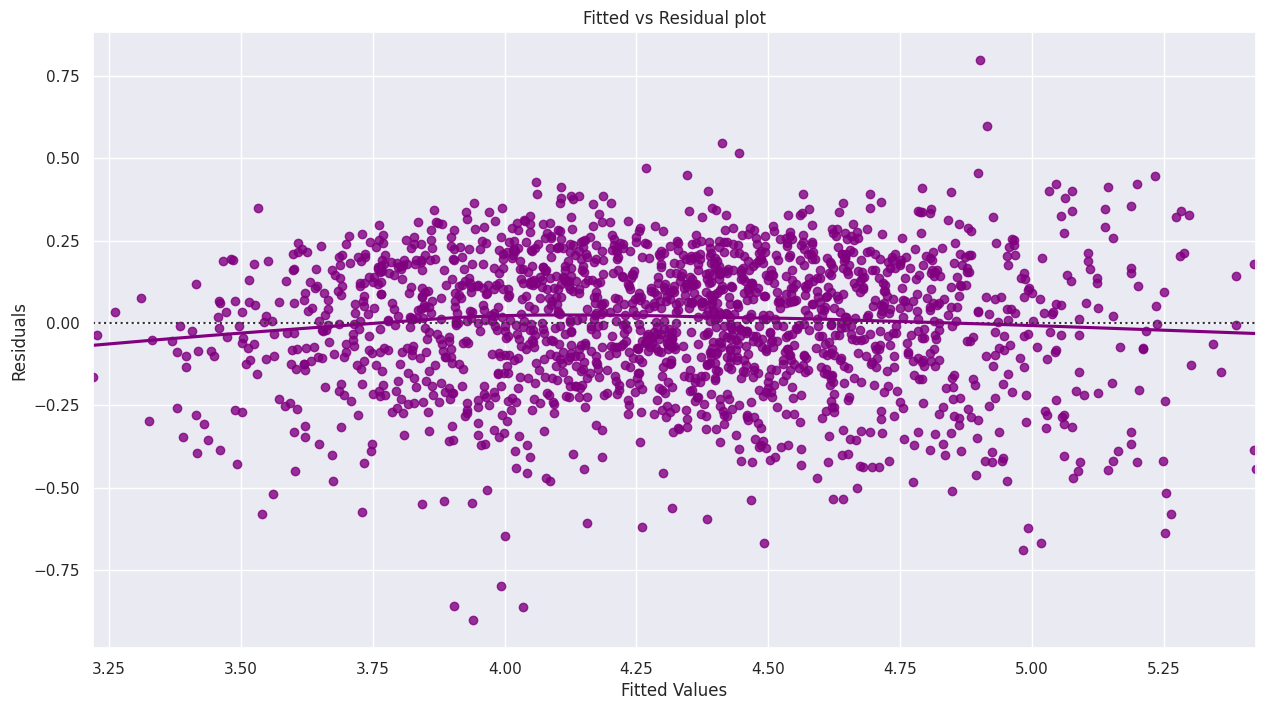

In [ ]:
# plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Observations:

The scatter plot’s depiction of the residuals against the predicted values does not reveal any discernible pattern. This absence of pattern suggests that the data adheres to the linearity assumption, indicating that the relationship between the independent variables and the dependent variable is linear.

Additionally, the lack of pattern supports the assumption of independence, which posits that the residuals are independent of each other. This is a crucial aspect of regression analysis, as it implies that the model’s errors are not influenced by any systematic factor, allowing for more reliable predictions.

In essence, the scatter plot analysis reinforces the model’s validity by confirming that the key assumptions of linearity and independence, which underpin the regression analysis, are met. This provides a solid foundation for the model’s predictive capabilities and the trustworthiness of its insights.

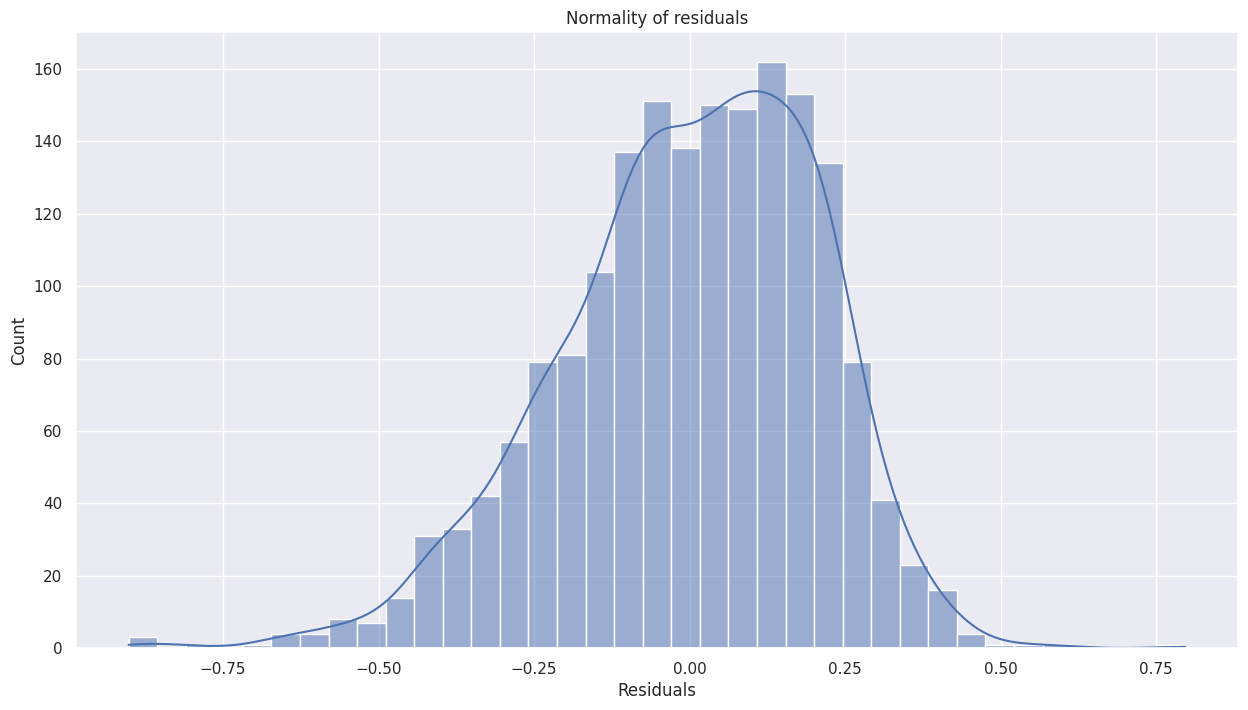

In [ ]:
# test for normality
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

Observations:

They look normal, but not exactly. We will check with QQ plot.

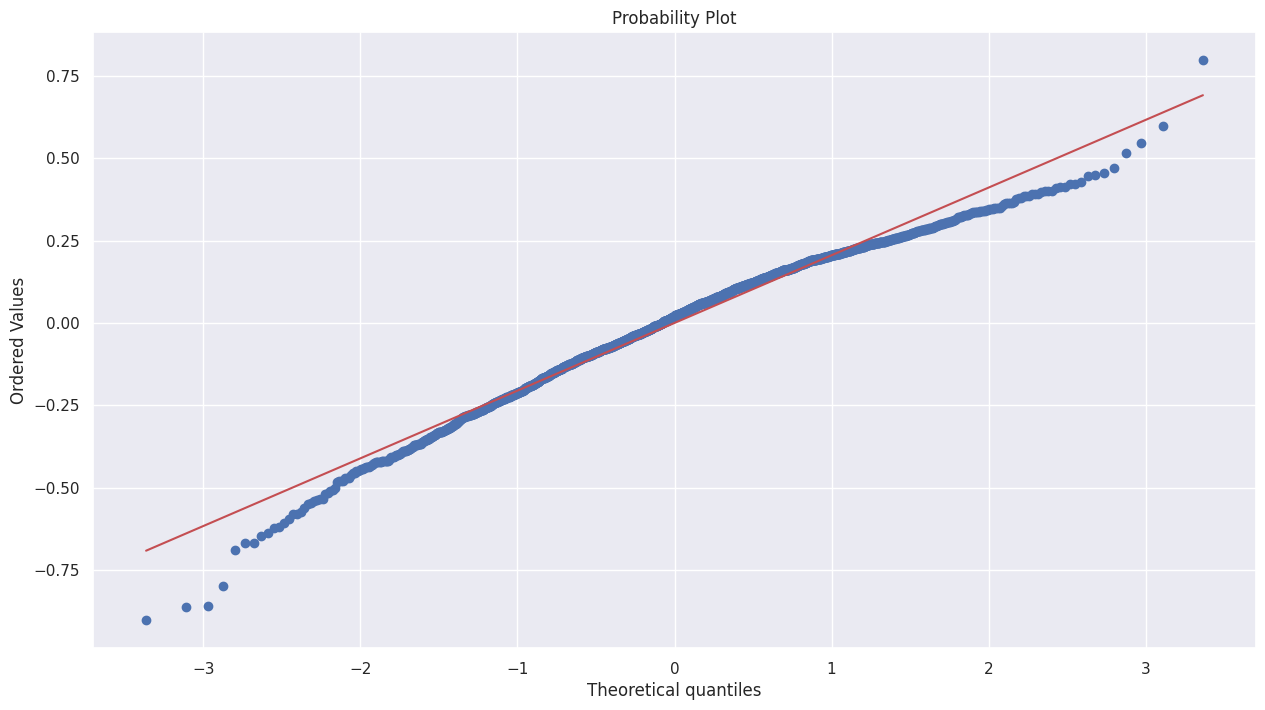

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Observations:

The residuals more or less follow a straight line except for the tails. Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9825822114944458, pvalue=4.877755100871073e-14)

Observations:
- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal, but as an approximation, we can accept this distribution as close to being normal.

In [ ]:
 # lets check homoecstacity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 0.9840488571654017), ('p-value', 0.5949075920875397)]

Observations:

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

In [ ]:
# Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.
# preditions on test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1019,3.664587,4.070431
416,4.297149,4.353426
307,4.396299,4.470002
3046,3.782597,3.841101
1279,4.721441,4.750786
2218,4.357222,4.146255
187,4.131801,4.074944
2197,4.466368,4.090717
3085,4.603969,4.483368
1638,5.184589,4.888453


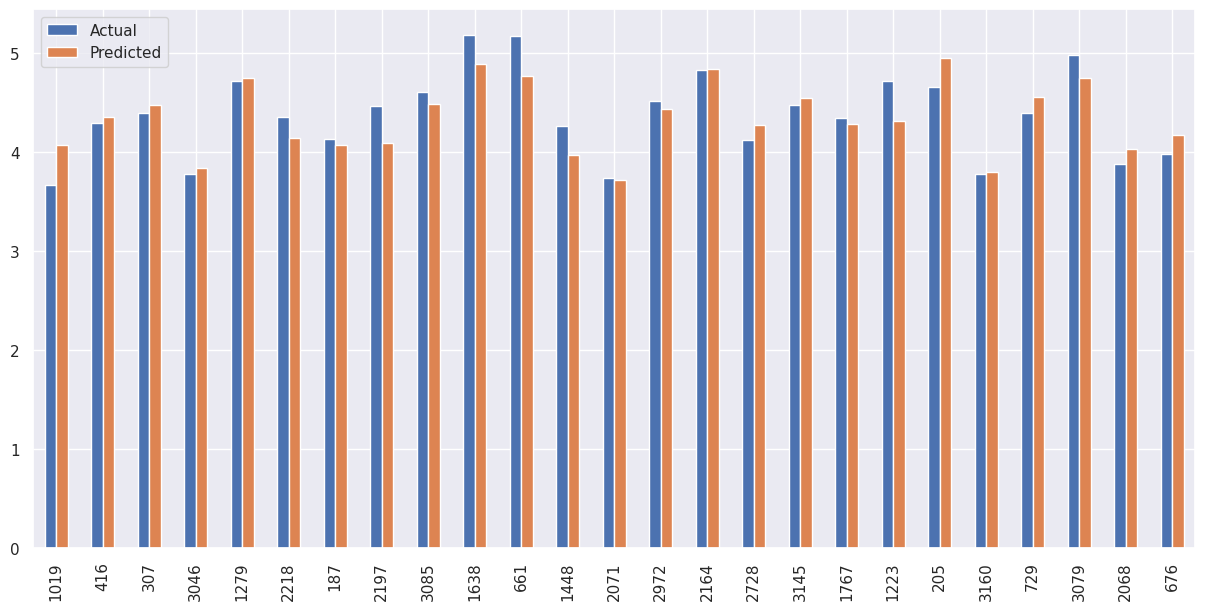

In [ ]:
# visualization of predicting behaviour
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

Observations:

Altough there are some differences, we can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

## Final Model

Recreate the final model and print it's summary to gain insights

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.802
Model:                               OLS   Adj. R-squared:                  0.801
Method:                    Least Squares   F-statistic:                     661.9
Date:                   Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                           13:59:14   Log-Likelihood:                 284.04
No. Observations:                   1810   AIC:                            -544.1
Df Residuals:                       1798   BIC:                            -478.1
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observations:

- The OLS regression results show a strong R-squared value of 0.802, indicating that approximately 80.2% of the variability in the normalized used price can be explained by the model. This is a robust level of explanatory power.
- The Adjusted R-squared is very close to the R-squared value at 0.801, which suggests that the number of predictors in the model is appropriate and the model is not overfitted.
- The F-statistic is significant with a value of 661.9 and a Prob (F-statistic) of nearly 0.00, indicating that the model is statistically significant and the observed relationship is not due to random chance.
- The coefficients of the variables are mostly positive, with the highest being for normalized_new_price (0.3435), indicating that as the new price increases, the used price also increases significantly.
- The brand names and operating systems (Apple, Realme, Xiaomi, and iOS) show positive coefficients, suggesting that these brands and the iOS operating system have a higher used price compared to the baseline brand and operating system.
- The presence of 4G and 5G capabilities also positively affects the used price, with coefficients of 0.0660 and 0.0793 respectively.
- The Durbin-Watson statistic is 2.049, which is close to the value of 2, suggesting that there is no significant autocorrelation in the residuals.

Overall, the model shows strong predictive power with significant predictors. However, the potential multicollinearity and the non-normal distribution of residuals are areas that may need further attention to ensure the robustness and reliability of the model. It’s important to consider these factors when making predictions or drawing conclusions from the model’s outputs.

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.206828,0.165779,0.801955,0.800521,3.90808


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.209405,0.168759,0.800634,0.797237,3.989336


Observations:
- The Mean Absolute Error (MAE) reflects the average absolute difference between the predicted values and the actual values. For the training performance, the MAE is 0.165779, and for the test performance, it is slightly higher at 0.168759. This slight increase in the test MAE suggests that the model may perform marginally worse on unseen data, but the difference is minimal, indicating good generalization.
- The R-squared value indicates how well the independent variables explain the variability of the dependent variable. With values of 0.801955 for training and 0.800634 for testing, the model explains over 80% of the variance in both cases, which is considered very good.
- The Adjusted R-squared takes into account the number of predictors in the model relative to the number of observations and adjusts the R-squared accordingly. The values are very close to the R-squared values for both training (0.800521) and testing (0.797237), indicating that the model’s predictors are relevant and the model is not overfitting.
- The Mean Absolute Percentage Error (MAPE) provides an understanding of prediction accuracy as a percentage. The training MAPE is 3.90808, and the testing MAPE is 3.989336, both of which are under 4%. This indicates that the model’s predictions are, on average, within 4% of the actual values, which is a strong level of accuracy.

Overall, these metrics suggest that the model is performing well, with high explanatory power and accuracy, and it generalizes well to new data. The consistency between the training and testing performances is a positive sign that the model is reliable.

## Actionable Insights and Recommendations

- Insights:
    - The model successfully predicts the normalized used price of devices, explaining approximately 80.2% of the variation in the data, which is slightly lower than the 84% mentioned in your peer’s text but still indicates a strong model.
    - With an R-squared value of 0.801955 on the training set and 0.800634 on the test set, the model demonstrates good predictive power and consistency across both datasets.
    - The most significant predictors for the normalized used device price include the normalized new price, screen size, main camera megapixels, selfie camera megapixels, internal memory, and the presence of 4G and 5G connectivity.
    - The model reveals positive correlations between the normalized used price and features such as normalized new price (0.3435), screen size (0.0304), main camera megapixels (0.0257), and selfie camera megapixels (0.0176), indicating that as these features increase, so does the used price1
    - The attributes included in the model are screen size, main camera megapixels, selfie camera megapixels, internal memory, weight (log-transformed), brand names (Apple, Realme, Xiaomi), and operating systems (iOS), along with 4G and 5G connectivity.

- Recommendations:
    - To enhance the model, consider incorporating customer demographic data such as age, income, and gender to better understand customer preferences across different price segments.
    - Introduce a categorical attribute to differentiate between device types (e.g., tablets, smartphones, low-end phones) to account for outliers and provide more nuanced predictions.
    - Encourage individuals to sell recent models with high-quality cameras and connectivity features, as these are strong predictors of used device prices.
    - Focus on acquiring devices with more RAM and 4G/5G connectivity, as these features appeal to certain customer segments and can command higher resale values.
    - Consider expanding the inventory to include high-priced new models and other gadgets like smartwatches to attract a broader customer base and potentially increase revenue.


___